# HOTEL BOOKINGS PREDICTION 

In [70]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    classification_report,
    make_scorer,
)
from sklearn.model_selection import train_test_split

# To filter the warnings
import warnings
warnings.filterwarnings("ignore")

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.naive_bayes import GaussianNB

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
d = pd.read_csv(r"C:\Users\LOKI\Downloads\INNHotelsGroup.csv") 

In [3]:
d

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [4]:
print(f"Shape: There are {d.shape[0]} rows and {d.shape[1]} columns")

Shape: There are 36275 rows and 19 columns


In [5]:
print(f"There are {d.duplicated().sum()} duplicates in this dataset.")

There are 0 duplicates in this dataset.


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
d.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
d.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [9]:
for i in d.columns:
    print(f"{i}")
    print(f"{i} : {d[i].value_counts()}")
    print("------------------------------------------------------------")

Booking_ID
Booking_ID : Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
------------------------------------------------------------
no_of_adults
no_of_adults : no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
------------------------------------------------------------
no_of_children
no_of_children : no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
------------------------------------------------------------
no_of_weekend_nights
no_of_weekend_nights : no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
------------------------------------------------------------
no_of_week_nights
no_of_week_nights : no_of_week_nights
2     11444
1      9488


In [10]:
for i in d.columns:
    print(f"{i} : {d[i].nunique()}")

Booking_ID : 36275
no_of_adults : 5
no_of_children : 6
no_of_weekend_nights : 8
no_of_week_nights : 18
type_of_meal_plan : 4
required_car_parking_space : 2
room_type_reserved : 7
lead_time : 352
arrival_year : 2
arrival_month : 12
arrival_date : 31
market_segment_type : 5
repeated_guest : 2
no_of_previous_cancellations : 9
no_of_previous_bookings_not_canceled : 59
avg_price_per_room : 3930
no_of_special_requests : 6
booking_status : 2


## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [14]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

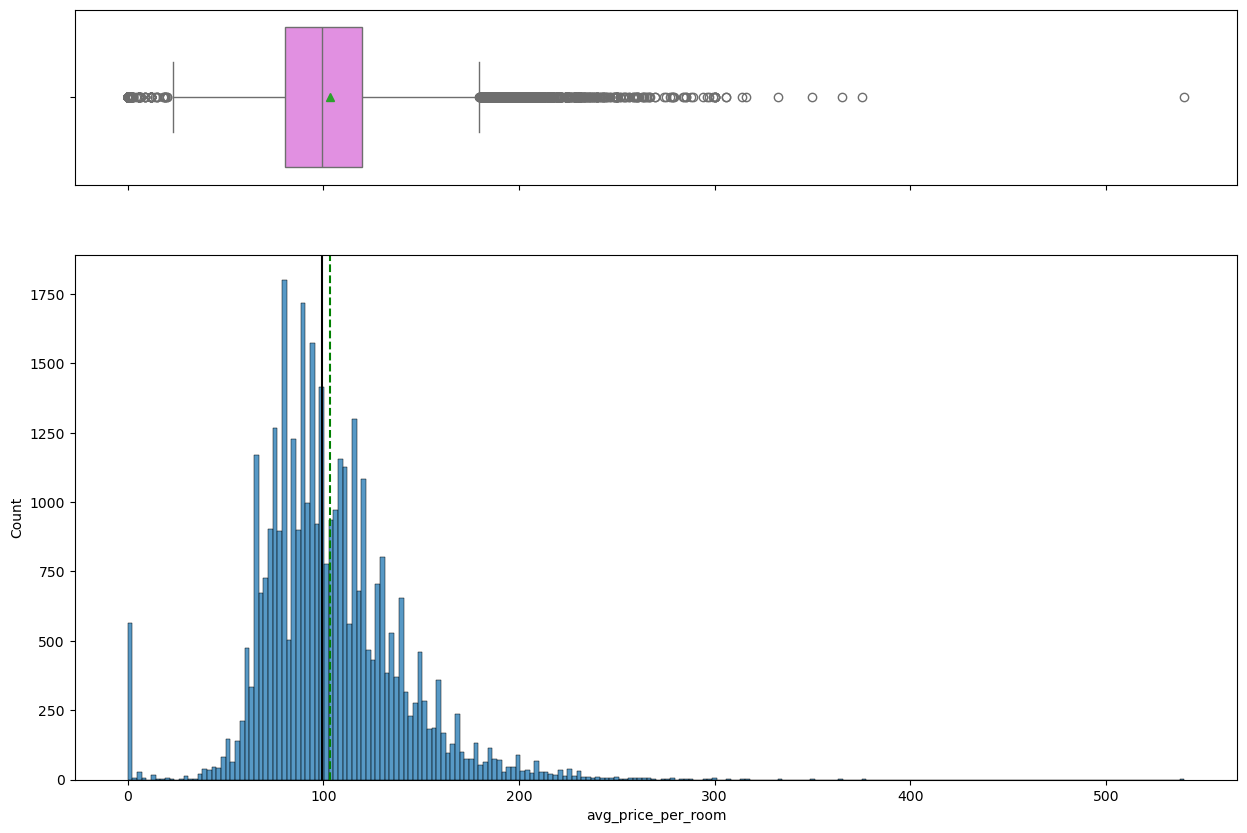

In [15]:
histogram_boxplot(d, "avg_price_per_room")

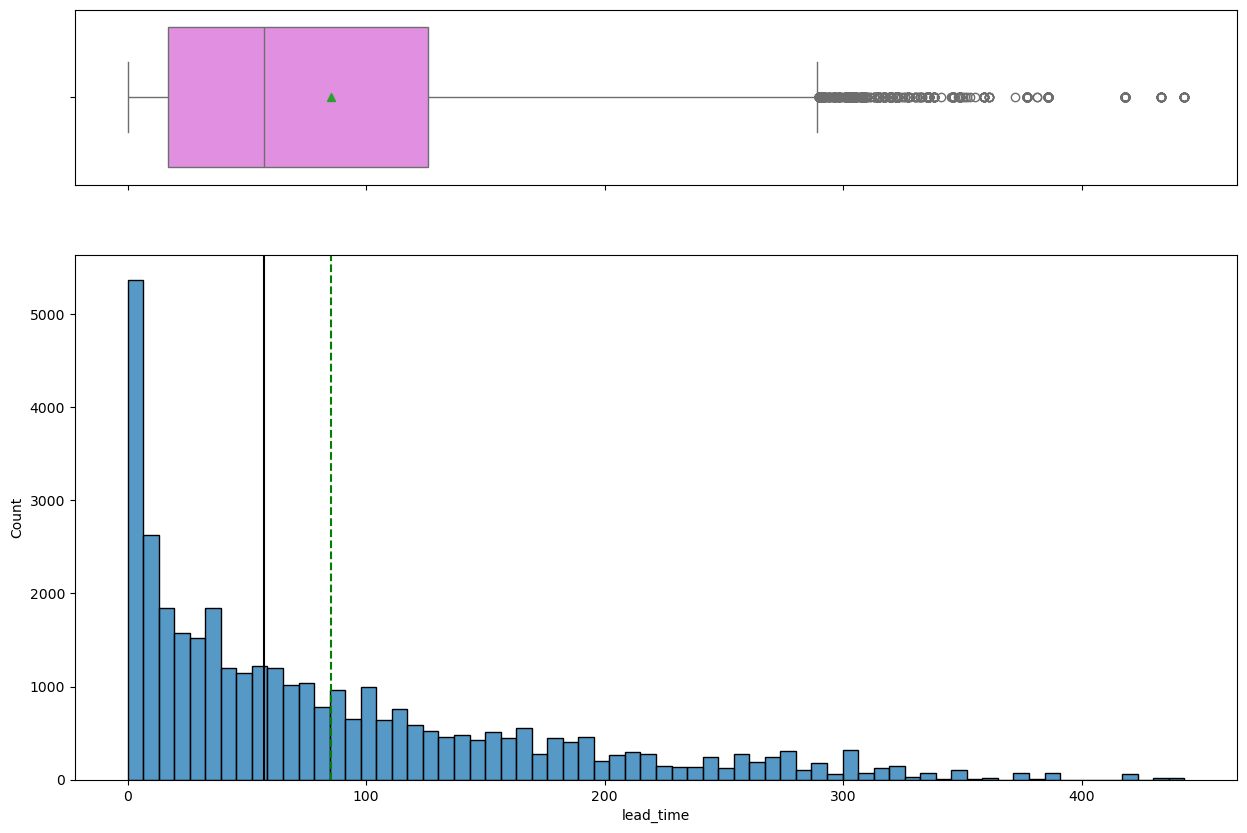

In [16]:
histogram_boxplot(d, "lead_time")

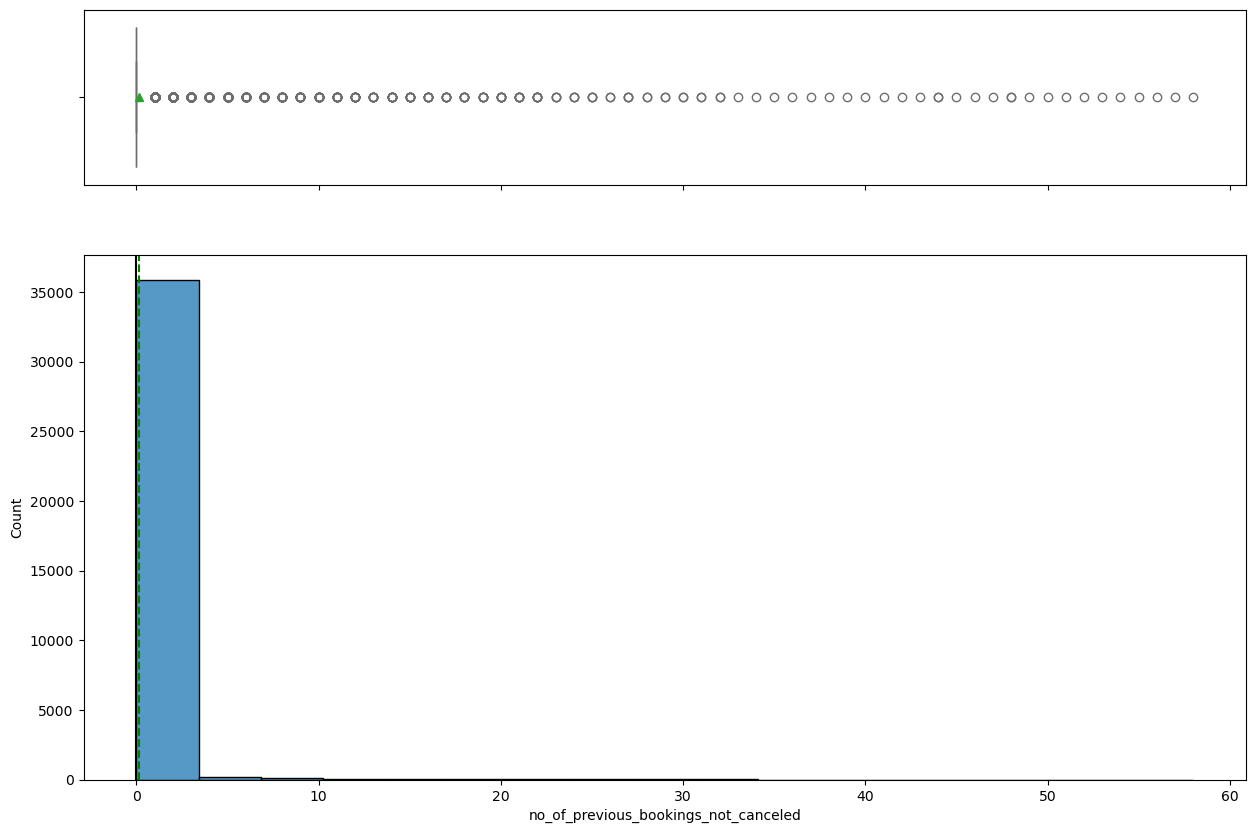

In [17]:
histogram_boxplot(d,'no_of_previous_bookings_not_canceled')

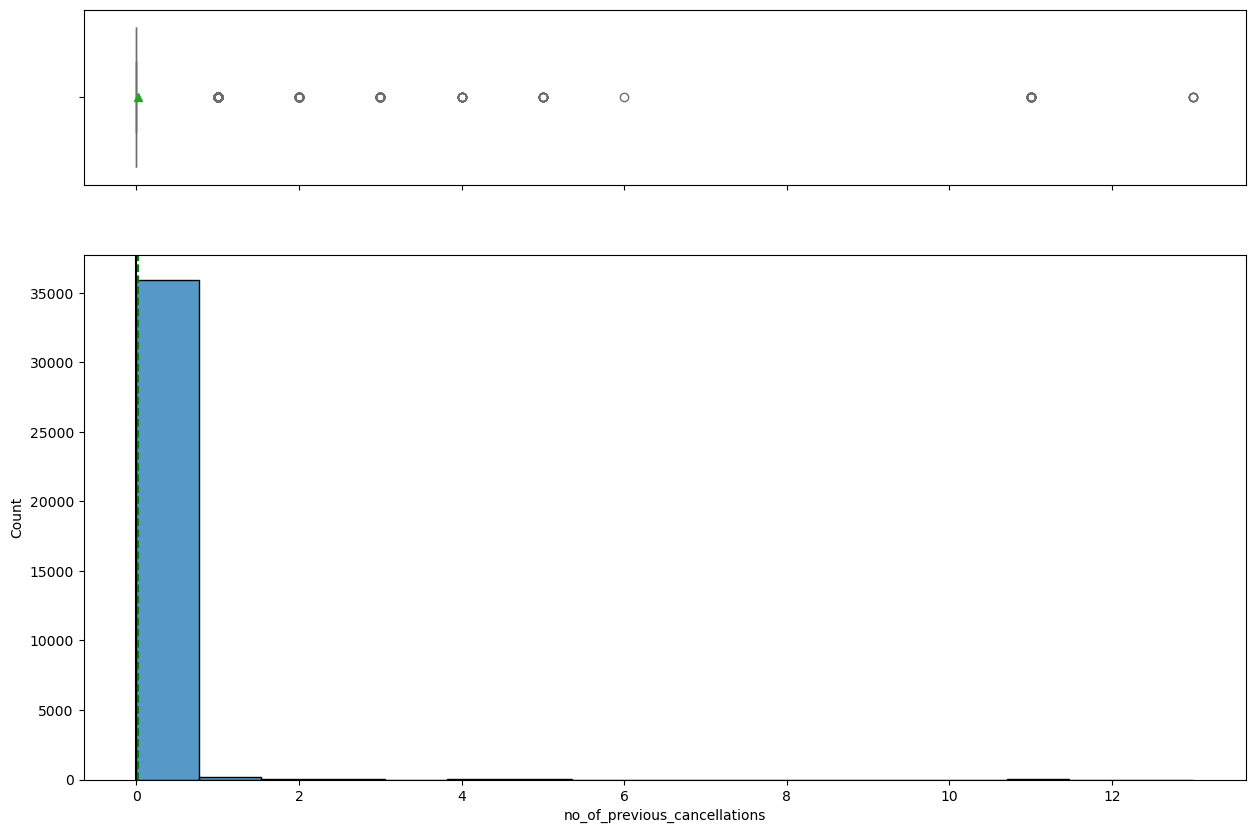

In [18]:
histogram_boxplot(d,'no_of_previous_cancellations')

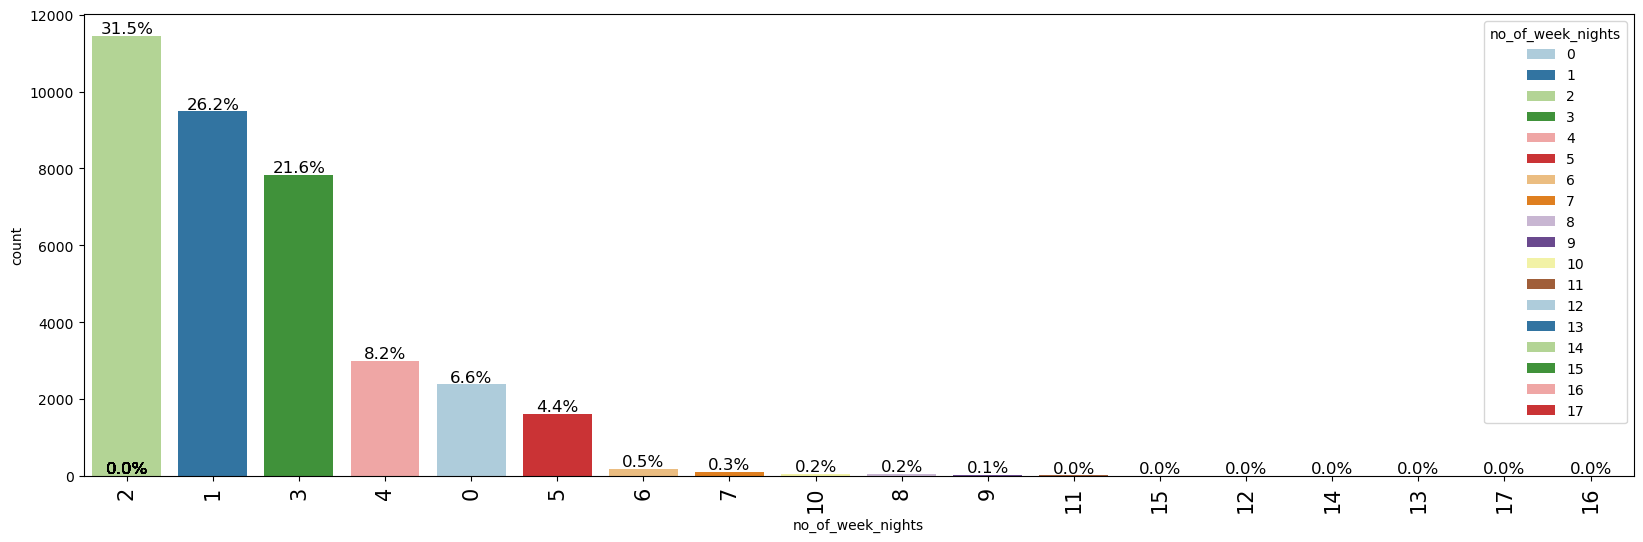

In [19]:
labeled_barplot(d,"no_of_week_nights",perc=True);

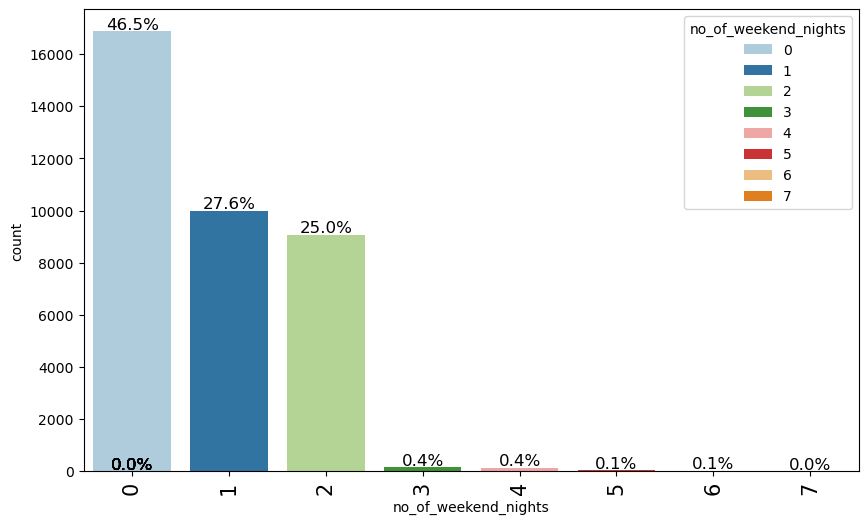

In [20]:
labeled_barplot(d,"no_of_weekend_nights",perc=True);

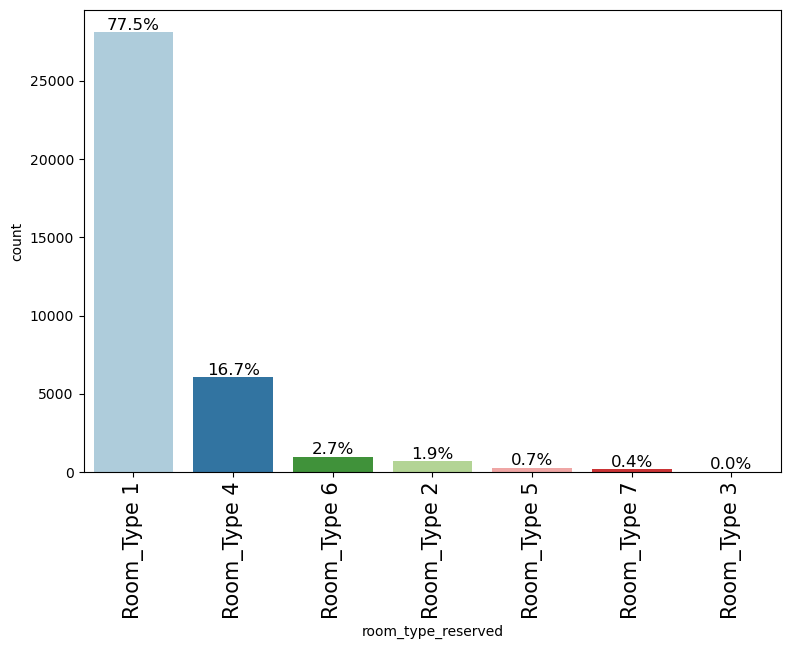

In [21]:
labeled_barplot(d,"room_type_reserved",perc=True);

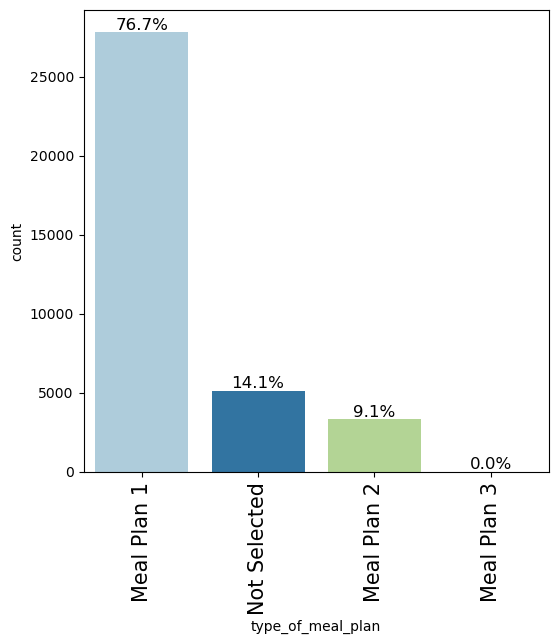

In [22]:
labeled_barplot(d,"type_of_meal_plan",perc=True);

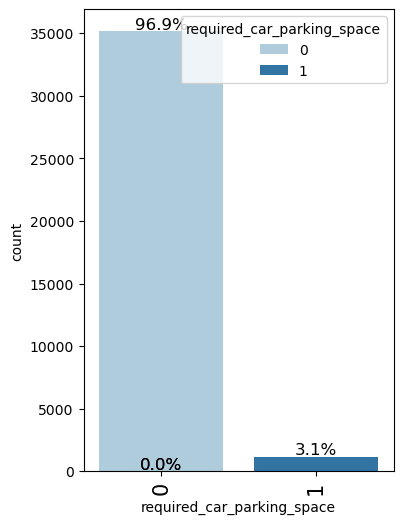

In [23]:
labeled_barplot(d,"required_car_parking_space",perc=True);

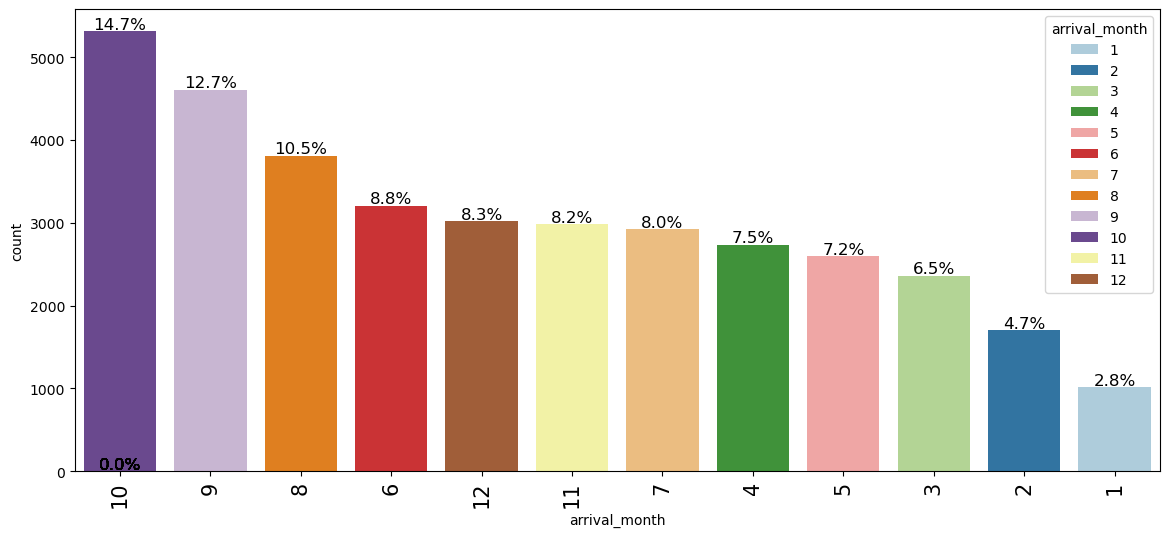

In [24]:
labeled_barplot(d,"arrival_month",perc=True);

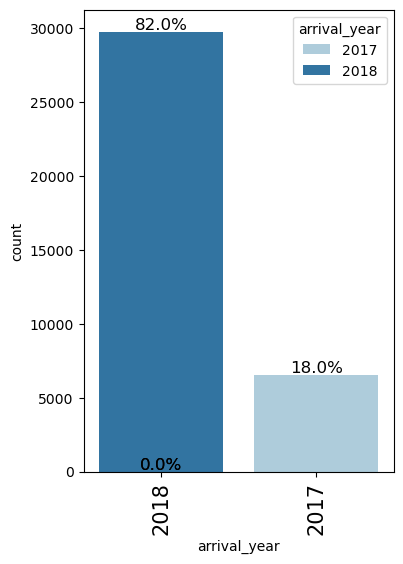

In [25]:
labeled_barplot(d,"arrival_year",perc=True);

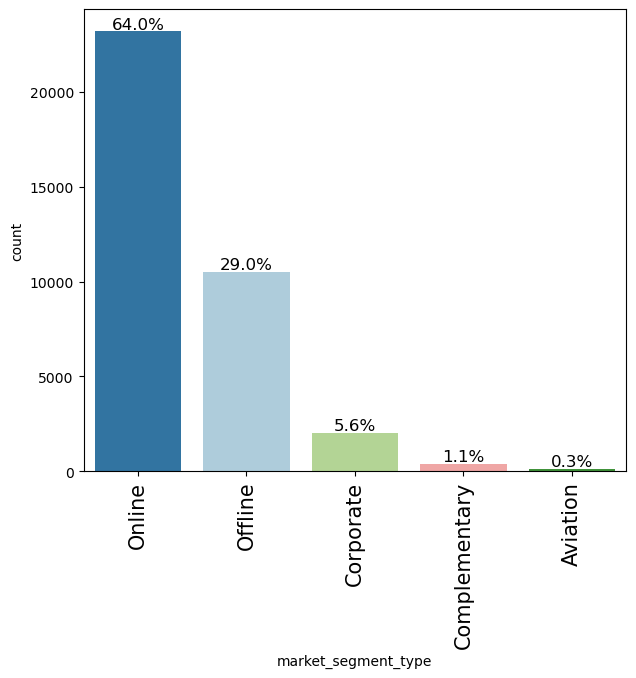

In [26]:
labeled_barplot(d,"market_segment_type",perc=True);

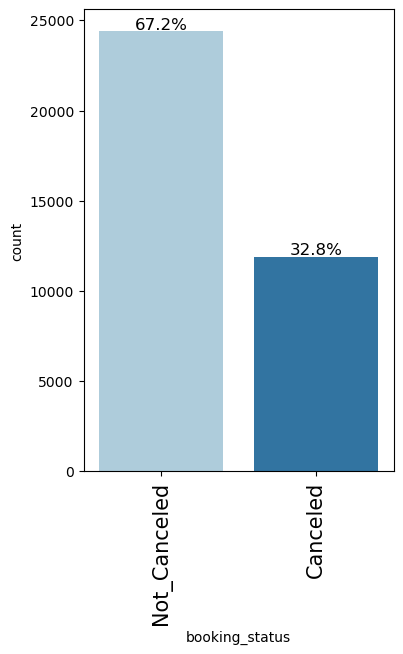

In [27]:
labeled_barplot(d,"booking_status",perc=True);

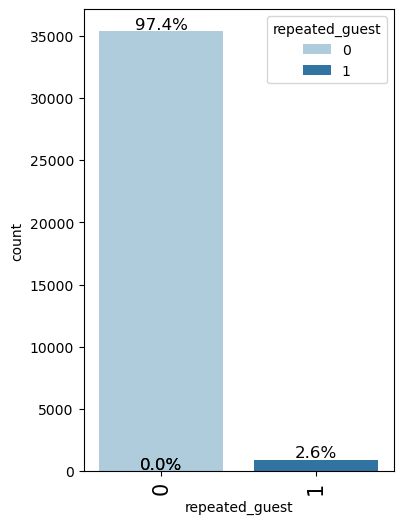

In [28]:
labeled_barplot(d,"repeated_guest",perc=True);

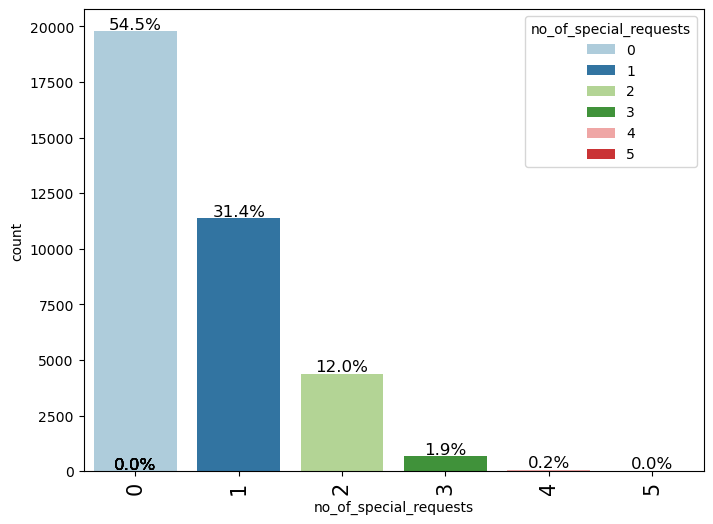

In [29]:
labeled_barplot(d,"no_of_special_requests",perc=True);

### Bivariate Analysis

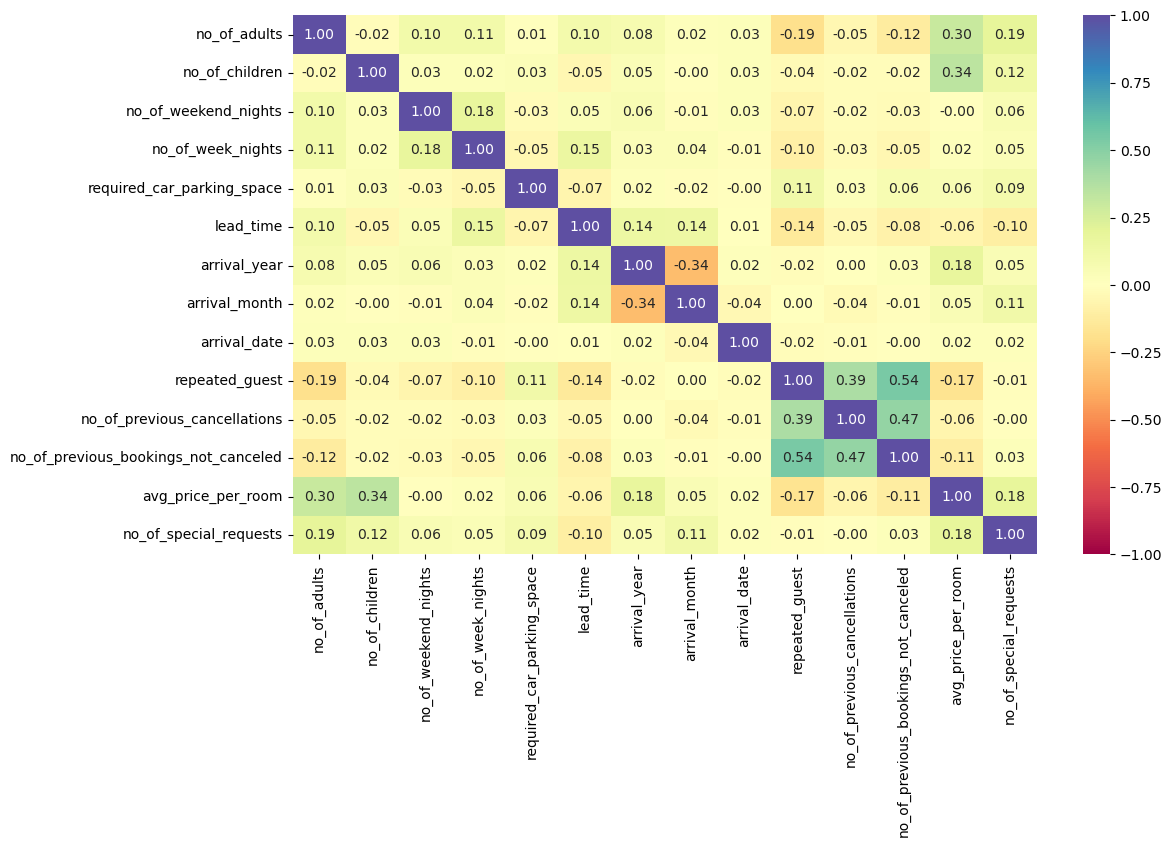

In [30]:
cols_list = d.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12,7))
sns.heatmap(d[cols_list].corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

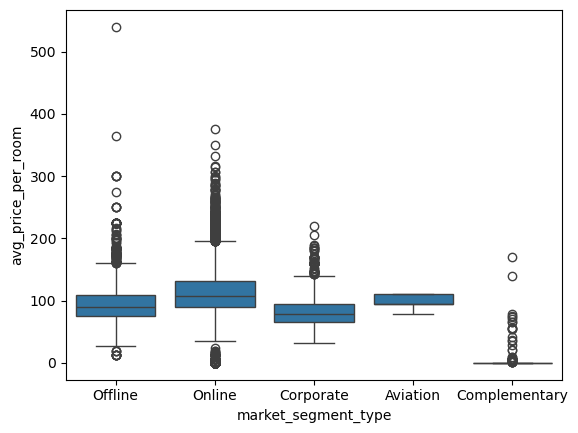

In [31]:
sns.boxplot(d,x='market_segment_type',y='avg_price_per_room');

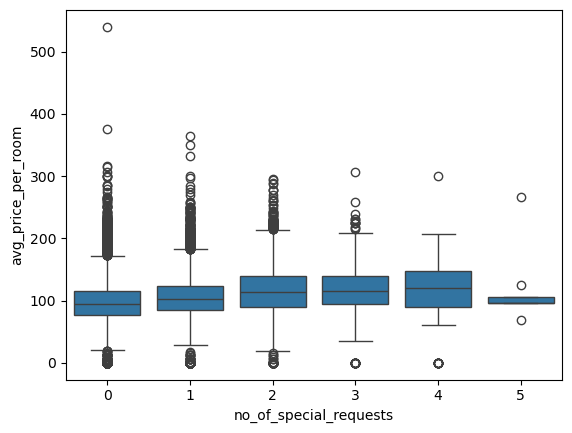

In [32]:
sns.boxplot(d,x='no_of_special_requests',y='avg_price_per_room');

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


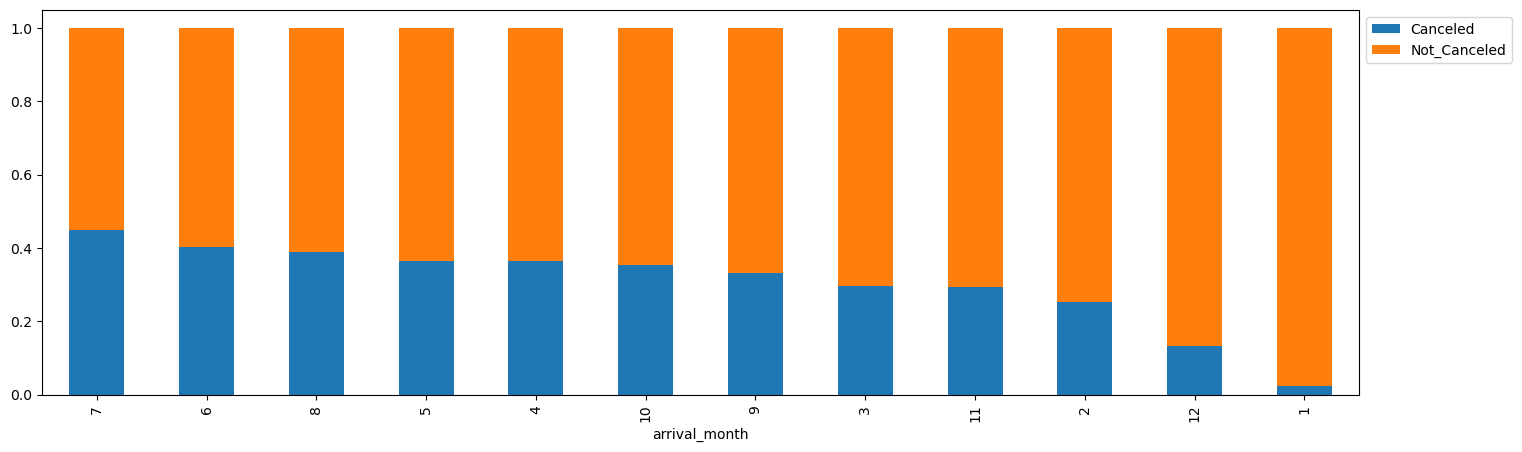

In [33]:
stacked_barplot(d,'arrival_month','booking_status')

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


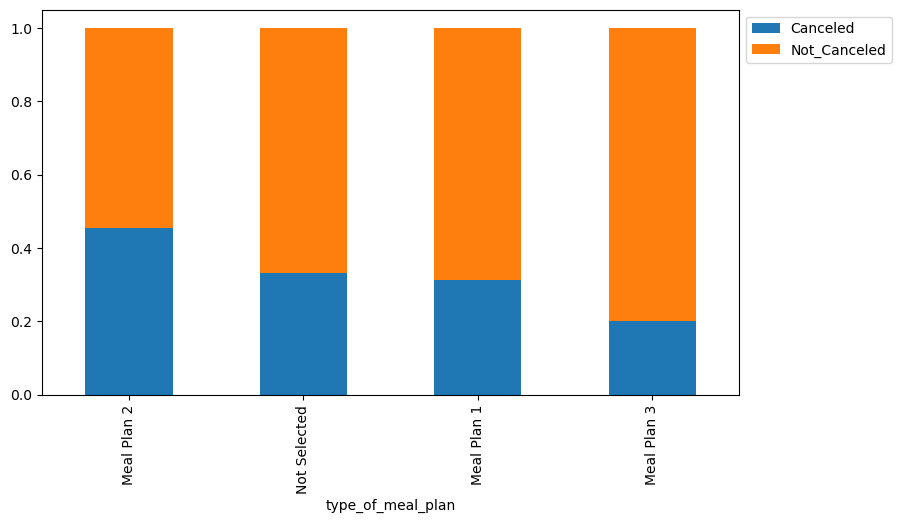

In [34]:
stacked_barplot(d,'type_of_meal_plan','booking_status')

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


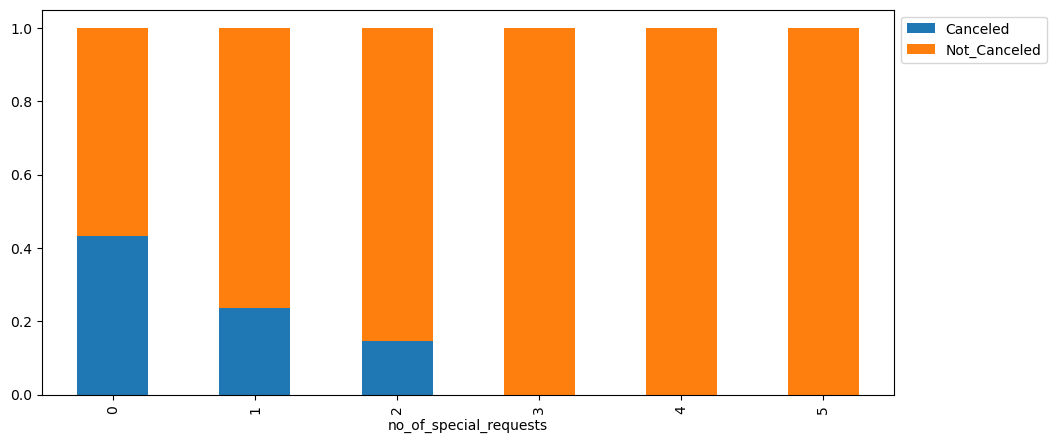

In [35]:
stacked_barplot(d,'no_of_special_requests','booking_status')

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


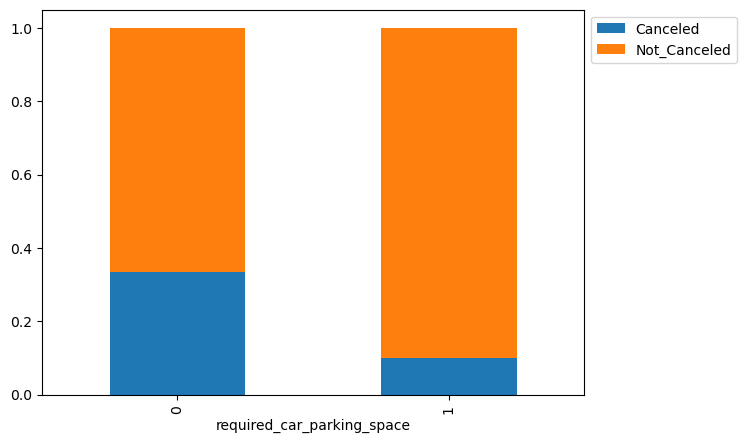

In [36]:
stacked_barplot(d,'required_car_parking_space','booking_status')

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


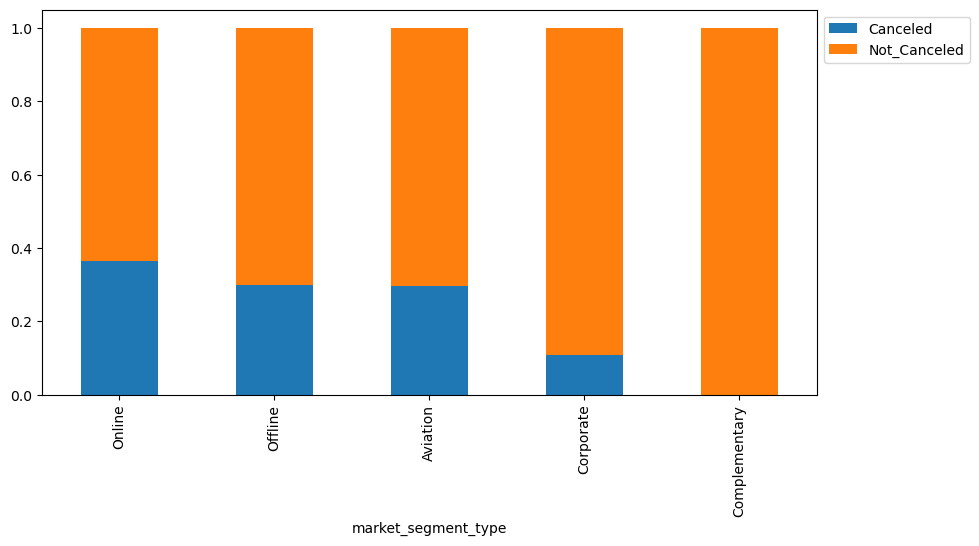

In [37]:
stacked_barplot(d,'market_segment_type','booking_status')

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


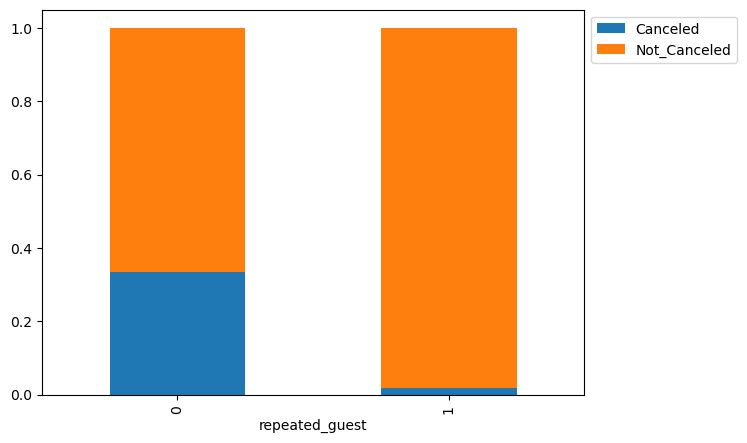

In [38]:
stacked_barplot(d,'repeated_guest','booking_status')

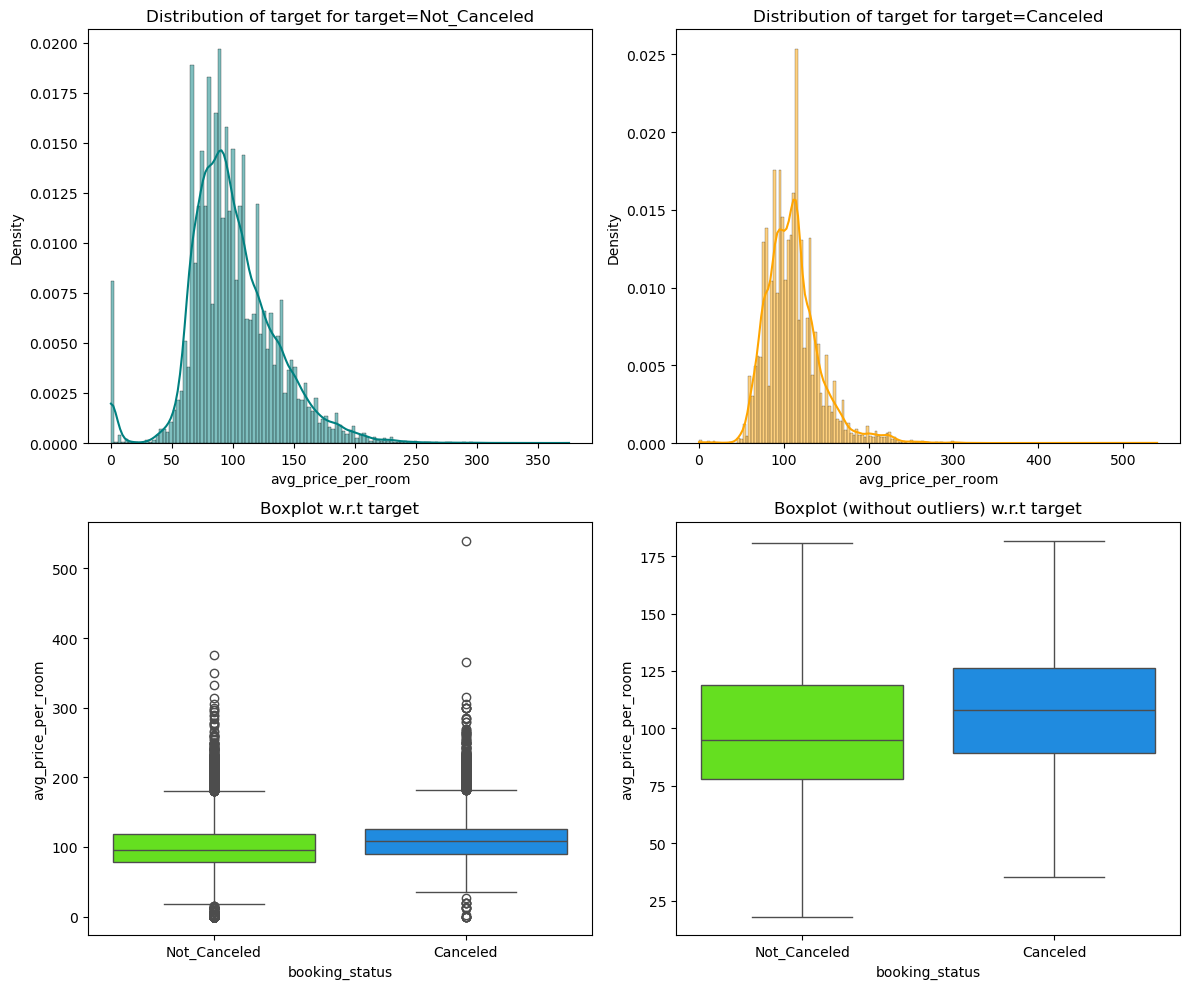

In [40]:
distribution_plot_wrt_target(d, 'avg_price_per_room', 'booking_status')

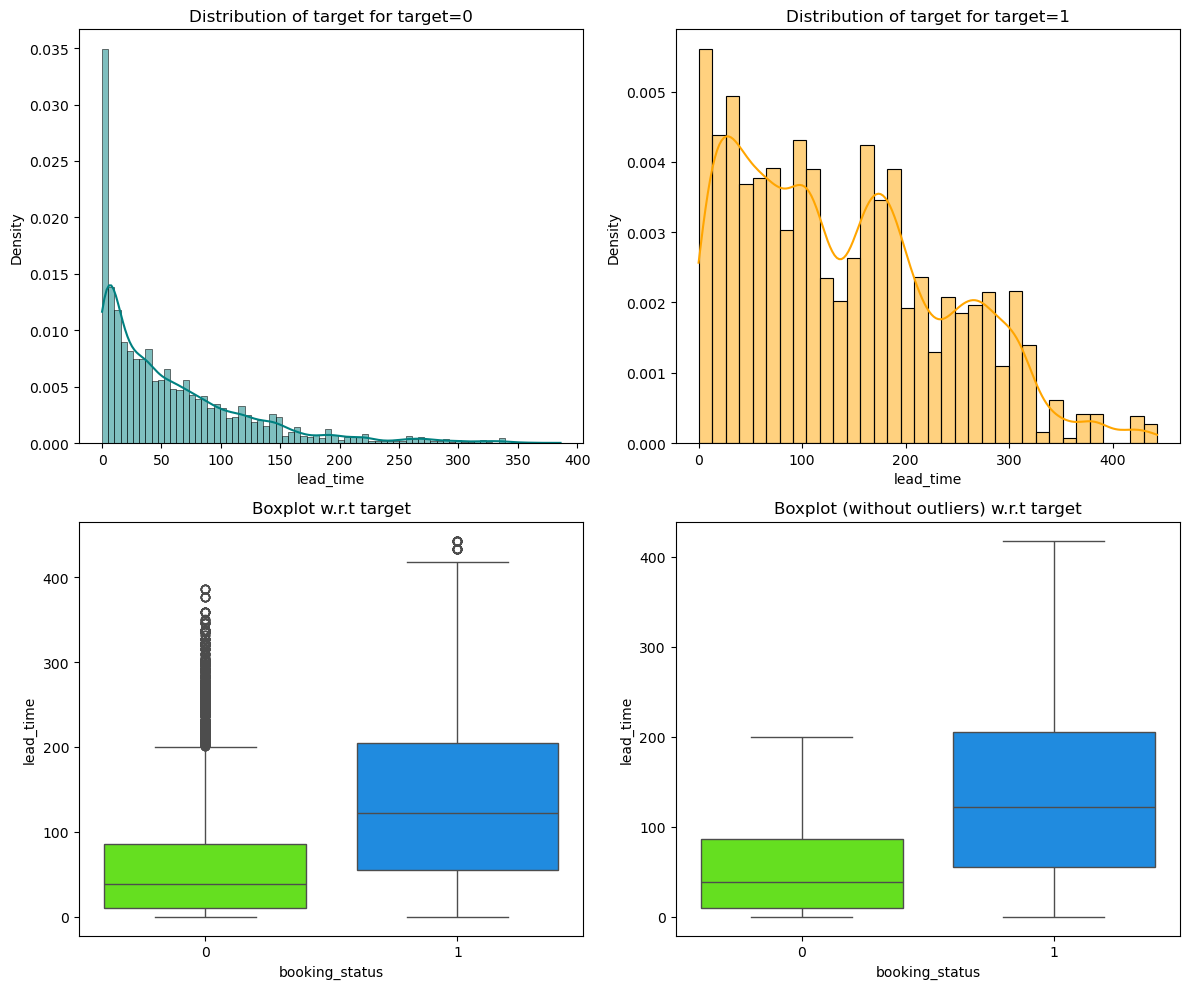

In [229]:
distribution_plot_wrt_target(d, 'lead_time', 'booking_status')

## EDA Questions

### 1. What are the busiest months in the hotel?

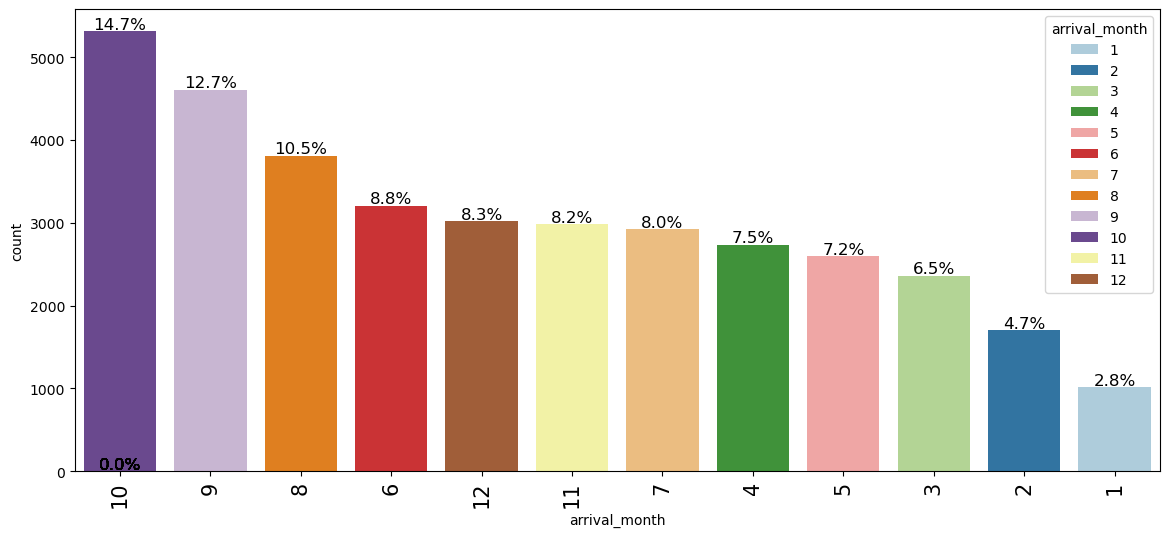

In [42]:
labeled_barplot(d,"arrival_month",perc=True);

### 2. Which market segment do most of the guests come from?

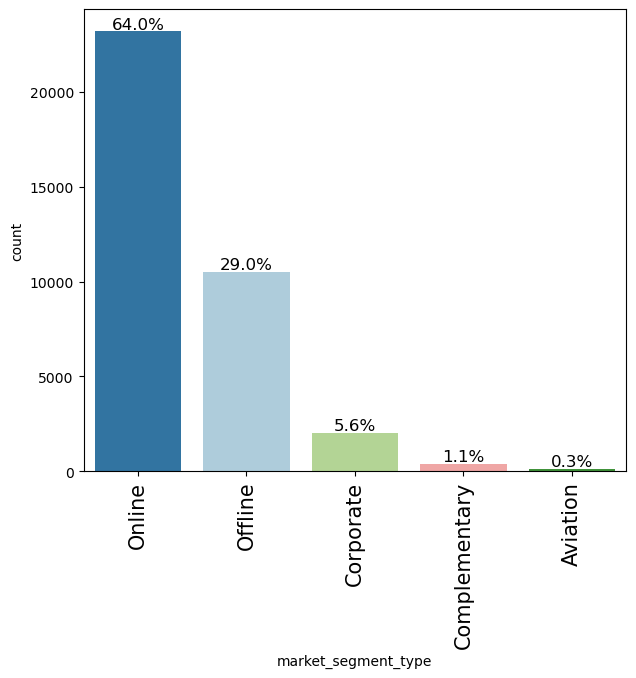

In [43]:
labeled_barplot(d,"market_segment_type",perc=True);

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

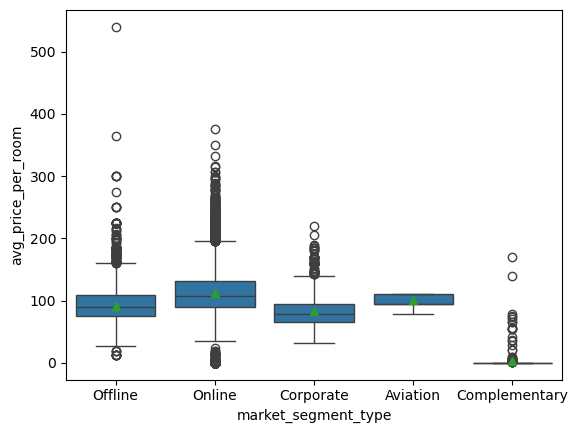

In [44]:
sns.boxplot(d, x="market_segment_type", y="avg_price_per_room",showmeans=True);

### 4. What percentage of bookings are canceled?

                Count  Perecentage
booking_status                    
Not_Canceled    24390    67.236389
Canceled        11885    32.763611


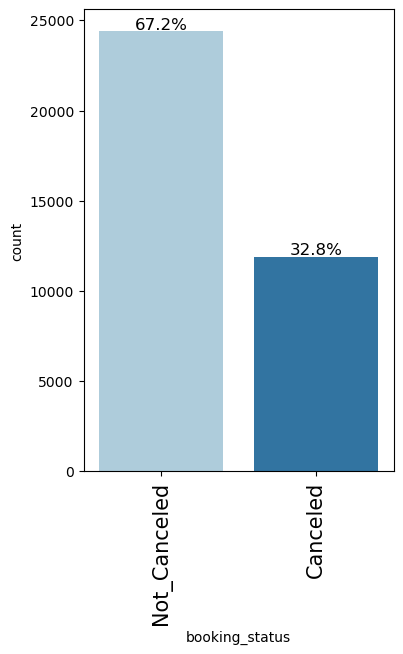

In [45]:
print(pd.DataFrame({'Count':d["booking_status"].value_counts(), "Perecentage":d["booking_status"].value_counts("Not_Canceled")*100}))
labeled_barplot(d,"booking_status",perc=True);

### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

repeated_guest  booking_status
0               Not_Canceled      66.419578
                Canceled          33.580422
1               Not_Canceled      98.279570
                Canceled           1.720430
Name: proportion, dtype: float64

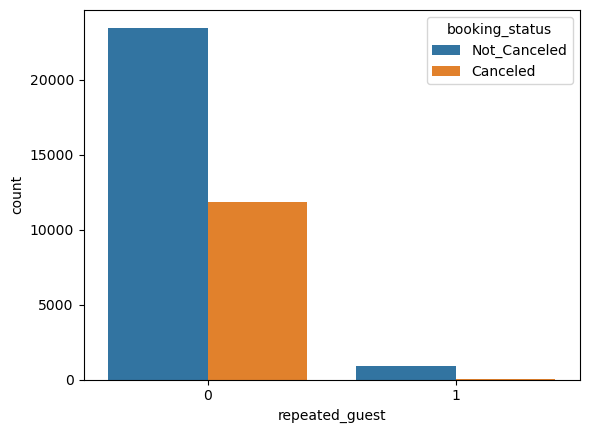

In [46]:
sns.countplot(d,x="repeated_guest",hue="booking_status");
d.groupby(["repeated_guest"])["booking_status"].value_counts("Not_Canceled")*100

### 6.Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

no_of_special_requests  booking_status
0                       Not_Canceled       56.793245
                        Canceled           43.206755
1                       Not_Canceled       76.233184
                        Canceled           23.766816
2                       Not_Canceled       85.403300
                        Canceled           14.596700
3                       Not_Canceled      100.000000
4                       Not_Canceled      100.000000
5                       Not_Canceled      100.000000
Name: proportion, dtype: float64

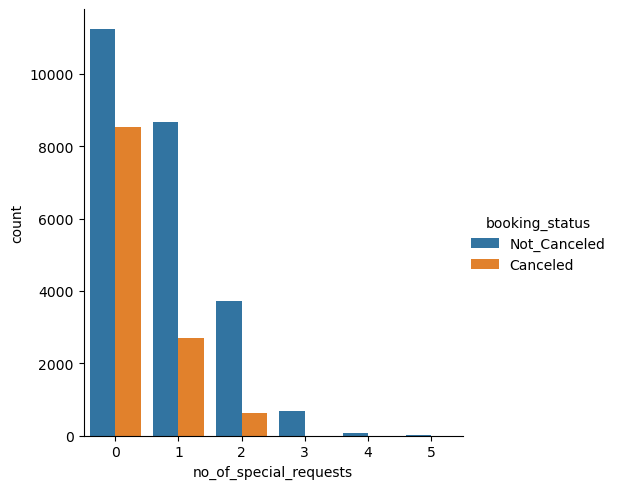

In [47]:
sns.catplot(data=d,x="no_of_special_requests",hue="booking_status",kind="count");
d.groupby(["no_of_special_requests"])["booking_status"].value_counts("Not_Cancelled")*100

## DATA PREPROCESSING

### Missing value treatment

In [48]:
d.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no null values or missing values in this dataset.

### Outlier treatment

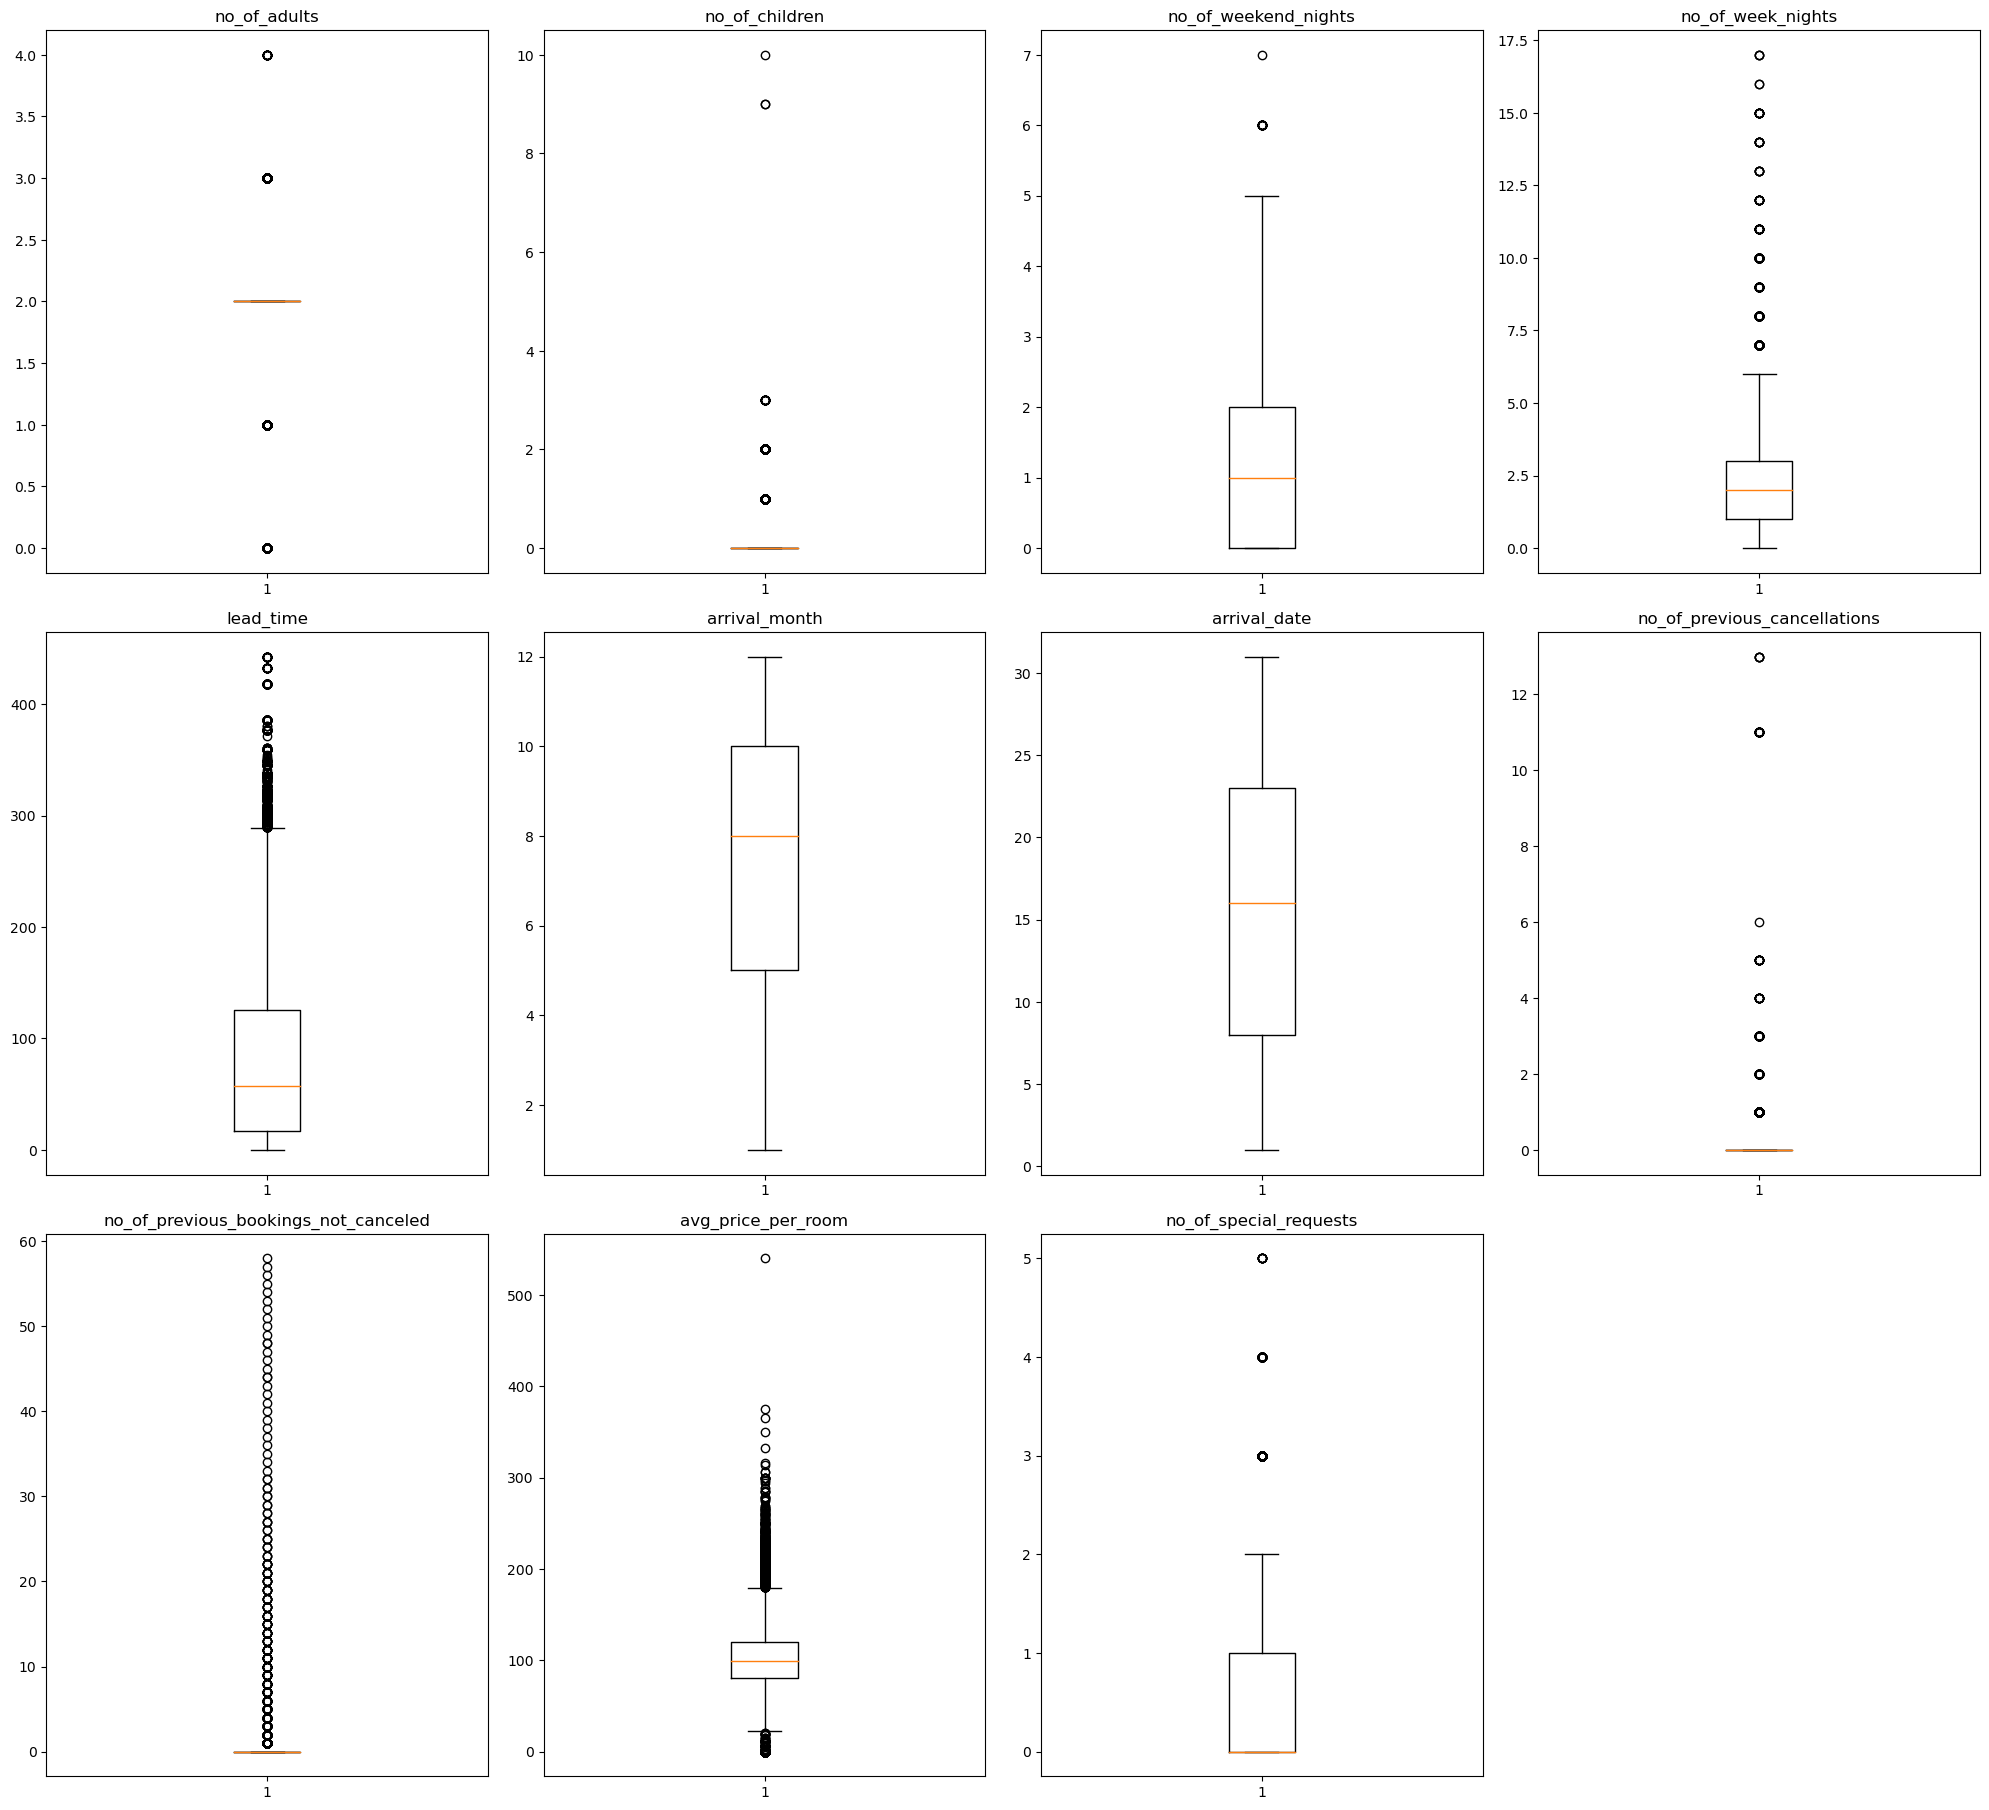

In [49]:
# outlier detection using boxplot
num_cols = d.select_dtypes(include=np.number).columns.tolist()

# removing some columns because they works likes a categorical column
num_cols.remove("repeated_guest")
num_cols.remove("required_car_parking_space")
num_cols.remove("arrival_year")

# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(d[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Feature Engineering

In [50]:
d["arrival_date"].value_counts()

arrival_date
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: count, dtype: int64

- Dropping BookingID column, because it is not useful for modelling.
- Dropping Arrival_date, as the distribution of data is approx equal across all the dates except 31
- Dropping Arrival_year, as there is only 2 years.

In [51]:
d.drop(["Booking_ID","arrival_date","arrival_year"],axis=1,inplace=True)

In [52]:
#Replacing the values of 9 and 10 with the maximum values of no_of_children, 
#because they seem like misinterpreted values

d['no_of_children'] = d['no_of_children'].replace({9: 3, 10: 3})


In [53]:
#Labelling the target variables as 0 and 1
d = d.replace({"booking_status":{"Not_Canceled":0 ,"Canceled":1}})

## LOGISTIC REGRESSION

In [112]:
d["booking_status"].value_counts(1)

booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64

In [113]:

X = d.drop(["booking_status"], axis=1)
Y = d["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X,columns=["room_type_reserved","market_segment_type","type_of_meal_plan"],drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [114]:
X

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0        1.0           2.0             0.0                   1.0   
1        1.0           2.0             0.0                   2.0   
2        1.0           1.0             0.0                   2.0   
3        1.0           2.0             0.0                   0.0   
4        1.0           2.0             0.0                   1.0   
...      ...           ...             ...                   ...   
36270    1.0           3.0             0.0                   2.0   
36271    1.0           2.0             0.0                   1.0   
36272    1.0           2.0             0.0                   2.0   
36273    1.0           2.0             0.0                   0.0   
36274    1.0           2.0             0.0                   1.0   

       no_of_week_nights  required_car_parking_space  lead_time  \
0                    2.0                         0.0      224.0   
1                    3.0                         0.0        5.0   
2                    1.0                         0.0        1.0   
3                    2.0                         0.0      211.0   
4                    1.0                         0.0       48.0   
...                  ...                         ...        ...   
36270                6.0                         0.0       85.0   
36271                3.0                         0.0      228.0   
36272                6.0                         0.0      148.0   
36273                3.0                         0.0       63.0   
36274                2.0                         0.0      207.0   

       arrival_month  repeated_guest  no_of_previous_cancellations  ...  \
0               10.0             0.0                           0.0  ...   
1               11.0             0.0                           0.0  ...   
2                2.0             0.0                           0.0  ...   
3                5.0             0.0                           0.0  ...   
4                4.0             0.0                           0.0  ...   
...              ...             ...                           ...  ...   
36270            8.0             0.0                           0.0  ...   
36271           10.0             0.0                           0.0  ...   
36272            7.0             0.0                           0.0  ...   
36273            4.0             0.0                           0.0  ...   
36274           12.0             0.0                           0.0  ...   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
36270                             0.0                             0.0   
36271                             0.0                             0.0   
36272                             0.0                             0.0   
36273                             0.0                             0.0   
36274                             0.0                             0.0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                0.0   
4                                 0.0                                0.0   
...                               ...                                ...   
36270                             0.0                                0.0   

In [115]:
# fitting the model on training set
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit()

         Current function value: 0.423480
         Iterations: 35


In [116]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.3304
Time:                        22:11:41   Log-Likelihood:                -10753.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6266      0.272     -9.649      0.000      -3.160      -2.093
no_of_adults                             0.0239      

In [117]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [118]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [119]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.804742  0.630725   0.735595  0.679135

In [120]:
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg.predict(x_train) > 0.5
pred_train = np.round(pred_train)

#### Lets see the confusion matrix on training set

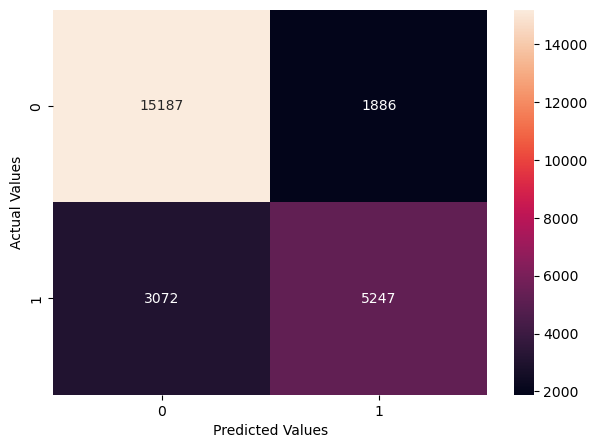

In [121]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### Lets check the accuracy model

In [122]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

Accuracy on training set :  0.8047416509136736


### Checking for Multicollinearity

In [123]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                   318.673648
no_of_adults                              1.344685
no_of_children                            2.085915
no_of_weekend_nights                      1.064976
no_of_week_nights                         1.093798
required_car_parking_space                1.034669
lead_time                                 1.251766
arrival_month                             1.050871
repeated_guest                            1.748572
no_of_previous_cancellations              1.321104
no_of_previous_bookings_not_canceled      1.565753
avg_price_per_room                        1.911579
no_of_special_requests                    1.245456
room_type_reserved_Room_Type 2            1.096033
room_type_reserved_Room_Type 3            1.003719
room_type_reserved_Room_Type 4            1.352339
room_type_reserved_Room_Type 5            1.030425
room_type_reserved_Room_Type 6            2.035961
room_type_reserved_Room_Type 7            1.093409
market_segment_ty

In [124]:
x_train1 = x_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                                   38.332470
no_of_adults                             1.327850
no_of_children                           2.084994
no_of_weekend_nights                     1.064533
no_of_week_nights                        1.093213
required_car_parking_space               1.034596
lead_time                                1.249320
arrival_month                            1.050718
repeated_guest                           1.745278
no_of_previous_cancellations             1.320982
no_of_previous_bookings_not_canceled     1.565522
avg_price_per_room                       1.911422
no_of_special_requests                   1.240928
room_type_reserved_Room_Type 2           1.095840
room_type_reserved_Room_Type 3           1.003718
room_type_reserved_Room_Type 4           1.347772
room_type_reserved_Room_Type 5           1.030422
room_type_reserved_Room_Type 6           2.035726
room_type_reserved_Room_Type 7           1.093279
market_segment_type_Complementary   

In [125]:
logit2 = sm.Logit(y_train, x_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, x_train1, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.804702  0.630965    0.73536  0.679174

In [126]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.3304
Time:                        22:11:42   Log-Likelihood:                -10753.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.7081      0.108    -24.975      0.000      -2.921      -2.496
no_of_adults                             0.0223      

### Dealing with p-values

In [127]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'type_of_meal_plan_Not Selected']


In [128]:
x_train2 = x_train1[selected_features]

In [129]:
logit3 = sm.Logit(y_train, x_train2.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.3296
Time:                        22:11:43   Log-Likelihood:                -10767.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.7358      0.092    -29.603      0.000      -2.917      -2.555
no_of_weekend_nights               0.1525      0.020      7.715      0.

### Coefficient Interpretations

In [130]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train2.columns)

Odds  Change_odd%
const                           0.064844   -93.515634
no_of_weekend_nights            1.164793    16.479261
no_of_week_nights               1.037052     3.705179
required_car_parking_space      0.194103   -80.589658
lead_time                       1.016553     1.655293
arrival_month                   0.934300    -6.570017
repeated_guest                  0.047958   -95.204213
no_of_previous_cancellations    1.332056    33.205602
avg_price_per_room              1.020612     2.061228
no_of_special_requests          0.229324   -77.067647
room_type_reserved_Room_Type 2  0.686378   -31.362175
room_type_reserved_Room_Type 4  0.776334   -22.366635
room_type_reserved_Room_Type 5  0.521365   -47.863549
room_type_reserved_Room_Type 6  0.443251   -55.674941
room_type_reserved_Room_Type 7  0.252069   -74.793125
market_segment_type_Corporate   0.415016   -58.498434
market_segment_type_Offline     0.166501   -83.349933
type_of_meal_plan_Not Selected  1.308544    30.854446

### Checking performance of the new model

**Training set performance**

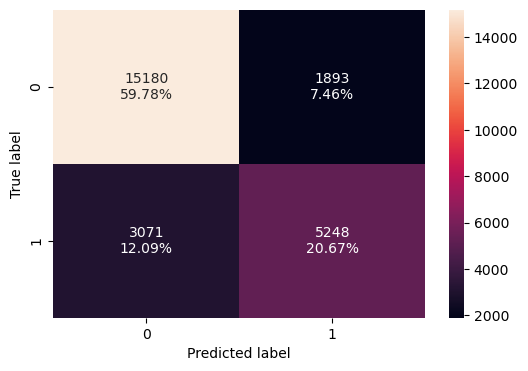

In [131]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train2, y_train)

In [132]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, x_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.804505  0.630845   0.734911  0.678913

**Test set performance**

In [133]:
X_test2 = x_test[list(x_train2.columns)]

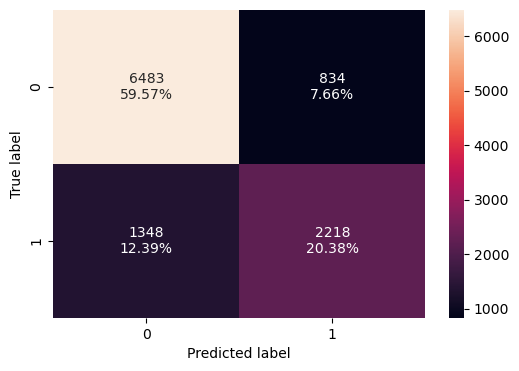

In [134]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test)

In [135]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.799504  0.621985   0.726737  0.670293

## Model Performance Improvement


### ROC-AUC

### Optimal threshold using AUC-ROC curve

In [136]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3104225763396561


**Checking model performance on training set**

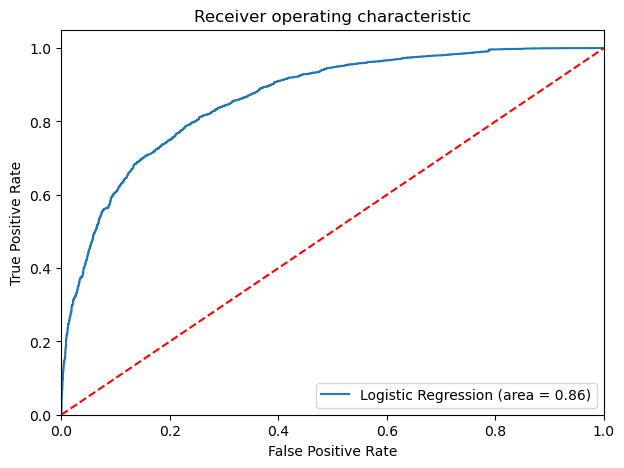

In [137]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(x_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

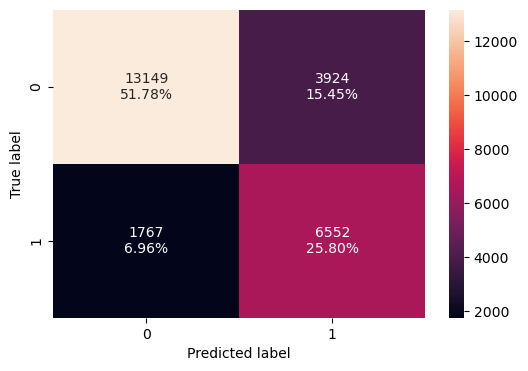

In [138]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [139]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.775874  0.787595    0.62543  0.697207

**Checking model performance on test set**

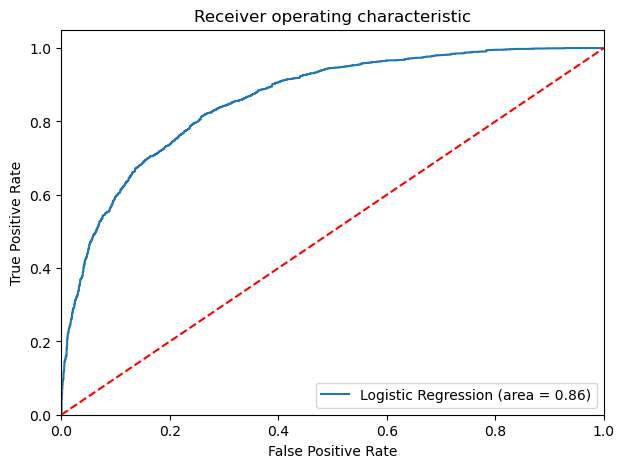

In [140]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

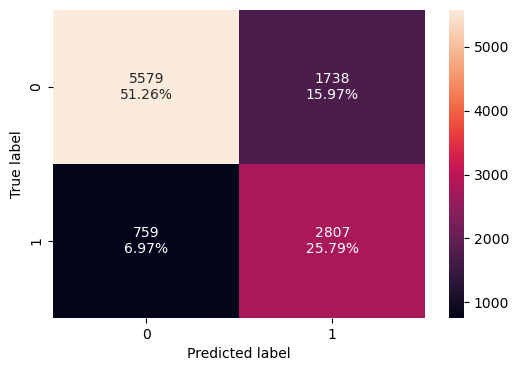

In [141]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [142]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0   0.77056  0.787156   0.617602  0.692146

### Precision-Recall Curve

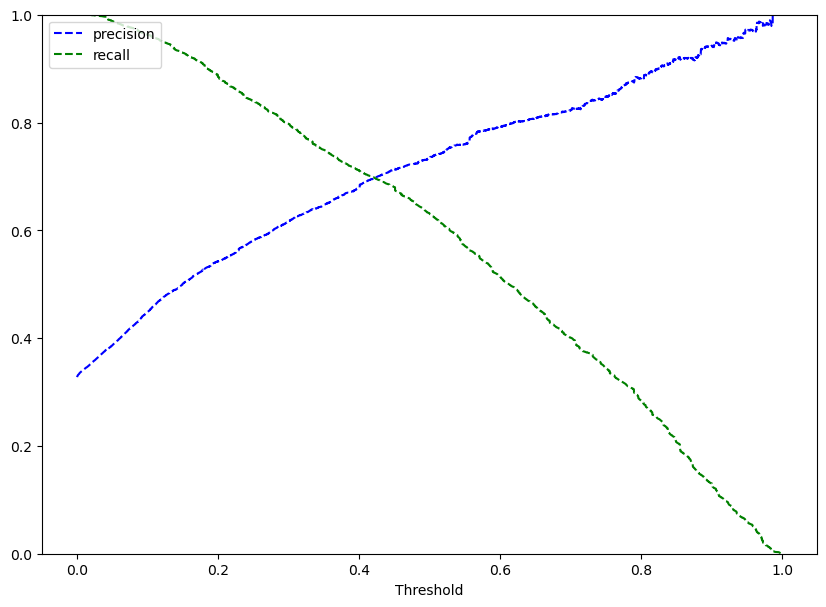

In [143]:
y_scores = lg3.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [144]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

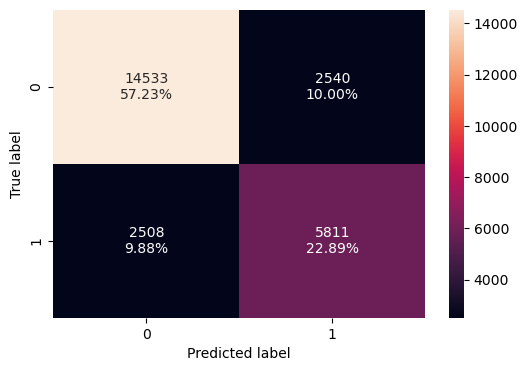

In [145]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train2, y_train, threshold=optimal_threshold_curve)

In [146]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.801197  0.698521   0.695845  0.697181

**Checking model performance on test set**

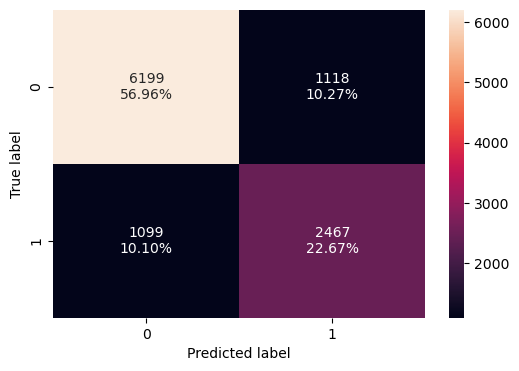

In [147]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_curve)

In [148]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.796288  0.691812   0.688145  0.689973

## NAIVE BAYES MODEL

In [149]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [150]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [151]:
X_nb = d.drop(["booking_status"], axis=1)
Y_nb = d["booking_status"]

# creating dummies
X_nb = pd.get_dummies(X_nb,columns=["room_type_reserved","market_segment_type","type_of_meal_plan"],drop_first=True)

X_nb = X_nb.astype(float)


In [152]:
X_nb

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0               2.0             0.0                   1.0                2.0   
1               2.0             0.0                   2.0                3.0   
2               1.0             0.0                   2.0                1.0   
3               2.0             0.0                   0.0                2.0   
4               2.0             0.0                   1.0                1.0   
...             ...             ...                   ...                ...   
36270           3.0             0.0                   2.0                6.0   
36271           2.0             0.0                   1.0                3.0   
36272           2.0             0.0                   2.0                6.0   
36273           2.0             0.0                   0.0                3.0   
36274           2.0             0.0                   1.0                2.0   

       required_car_parking_space  lead_time  arrival_month  repeated_guest  \
0                             0.0      224.0           10.0             0.0   
1                             0.0        5.0           11.0             0.0   
2                             0.0        1.0            2.0             0.0   
3                             0.0      211.0            5.0             0.0   
4                             0.0       48.0            4.0             0.0   
...                           ...        ...            ...             ...   
36270                         0.0       85.0            8.0             0.0   
36271                         0.0      228.0           10.0             0.0   
36272                         0.0      148.0            7.0             0.0   
36273                         0.0       63.0            4.0             0.0   
36274                         0.0      207.0           12.0             0.0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                               0.0                                   0.0   
1                               0.0                                   0.0   
2                               0.0                                   0.0   
3                               0.0                                   0.0   
4                               0.0                                   0.0   
...                             ...                                   ...   
36270                           0.0                                   0.0   
36271                           0.0                                   0.0   
36272                           0.0                                   0.0   
36273                           0.0                                   0.0   
36274                           0.0                                   0.0   

       avg_price_per_room  no_of_special_requests  \
0                   65.00                     0.0   
1                  106.68                     1.0   
2                   60.00                     0.0   
3                  100.00                     0.0   
4                   94.50                     0.0   
...                   ...                     ...   
36270              167.80                     1.0   
36271               90.95                     2.0   
36272               98.39                     2.0   
36273               94.50                     0.0   
36274              161.67                     0.0   

       room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
36270                   

In [153]:
# Splitting data in train and test sets
x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, Y_nb, test_size=0.30, random_state=1, stratify=Y_nb
)

In [154]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
nb = GaussianNB()

nb.fit(x_train_nb, y_train_nb)

GaussianNB()

**Checking model performance on training set**

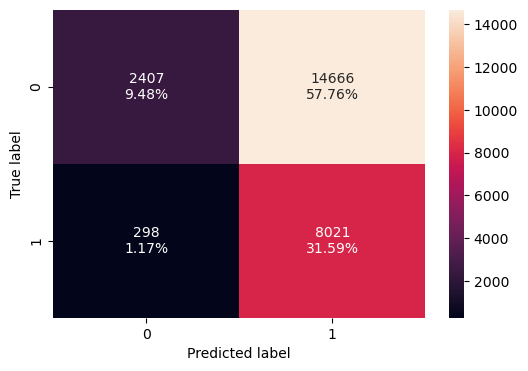

In [155]:
confusion_matrix_sklearn(nb, x_train_nb, y_train_nb)

In [156]:
nb_perf_train = model_performance_classification_sklearn(
    nb, x_train_nb, y_train_nb
)
nb_perf_train

Accuracy    Recall  Precision        F1
0  0.410681  0.964178    0.35355  0.517384

**Checking model performance on test set**

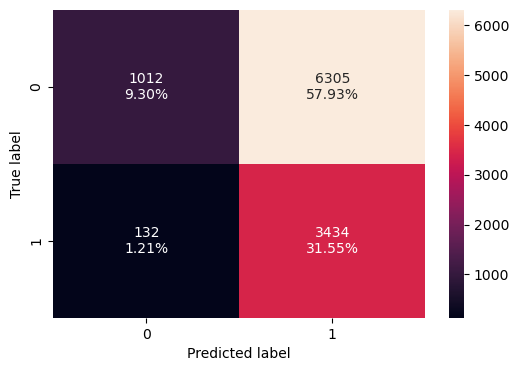

In [157]:
confusion_matrix_sklearn(nb, x_test_nb, y_test_nb)

In [158]:
nb_perf_test = model_performance_classification_sklearn(
    nb, x_test_nb, y_test_nb
)
nb_perf_test

Accuracy    Recall  Precision        F1
0  0.408527  0.962984   0.352603  0.516197

## kNN MODEL

In [159]:
X_knn = d.drop(["booking_status"], axis=1)
Y_knn = d["booking_status"]

# creating dummies
X_knn = pd.get_dummies(X_knn,columns=["room_type_reserved","market_segment_type","type_of_meal_plan"],drop_first=True)

X_knn = X_knn.astype(float)


In [160]:
# Splitting data in train and test sets
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, Y_knn, test_size=0.30, random_state=1)

In [161]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [162]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(weights='distance')

### Evaluate Performance of kNN Model

**Checking model performance on training set**

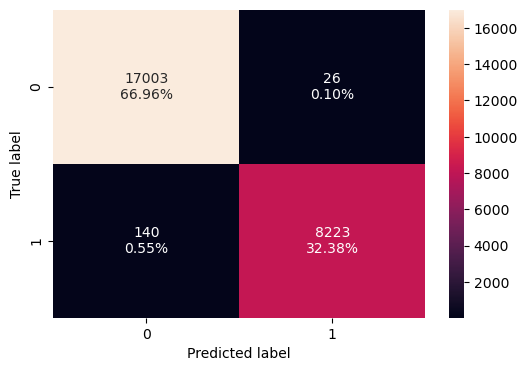

In [163]:
confusion_matrix_sklearn(NNH, x_train_knn, y_train_knn)

In [164]:
knn_perf_train_5 = model_performance_classification_sklearn(
    NNH, x_train_knn, y_train_knn
)
knn_perf_train_5

Accuracy   Recall  Precision        F1
0  0.993463  0.98326   0.996848  0.990007

**Checking model performance on test set**

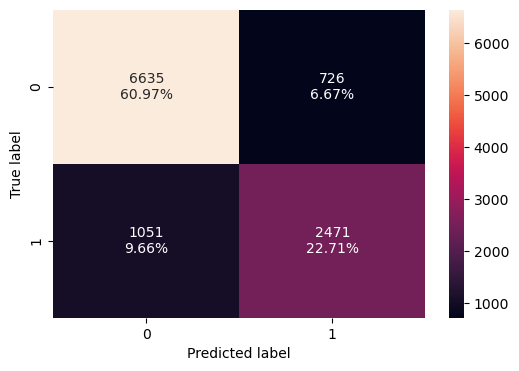

In [165]:
confusion_matrix_sklearn(NNH, x_test_knn, y_test_knn)

In [166]:
knn_perf_test_5 = model_performance_classification_sklearn(
    NNH, x_test_knn, y_test_knn
)
knn_perf_test_5

Accuracy   Recall  Precision        F1
0  0.836718  0.70159   0.772912  0.735526

### Choosing the K-Value by F1 score

In [167]:
scores =[]
for k in range(1,20):
    NNHk = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNHk.fit(x_train_knn, y_train_knn)
    y_pred_knn = NNHk.predict(x_test_knn)
    scores.append(f1_score(y_test_knn, y_pred_knn))

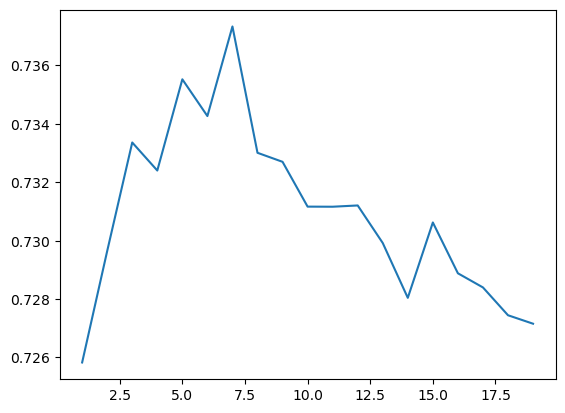

In [168]:
plt.plot(range(1,20),scores)

In [169]:
max_f1 = max(scores)
best_k_value = scores.index(max_f1)+1
print(f"The best k-value is {best_k_value}")

The best k-value is 7


### KNN MODEL (k=7) 

In [170]:
NNH_7 = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
NNH_7.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=7, weights='distance')

**Checking model performance on training set**

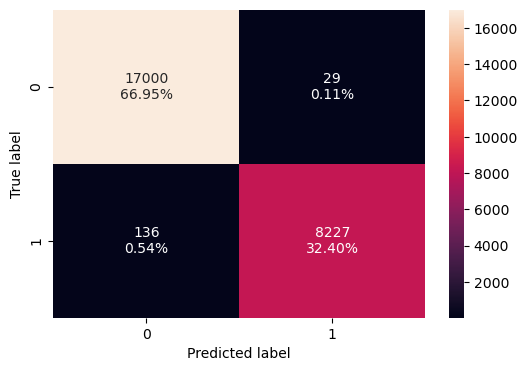

In [171]:
confusion_matrix_sklearn(NNH_7, x_train_knn, y_train_knn)

In [172]:
knn_perf_train_7 = model_performance_classification_sklearn(
    NNH_7, x_train_knn, y_train_knn
)
knn_perf_train_7

Accuracy    Recall  Precision        F1
0  0.993502  0.983738   0.996487  0.990072

**Checking model performance on test set**

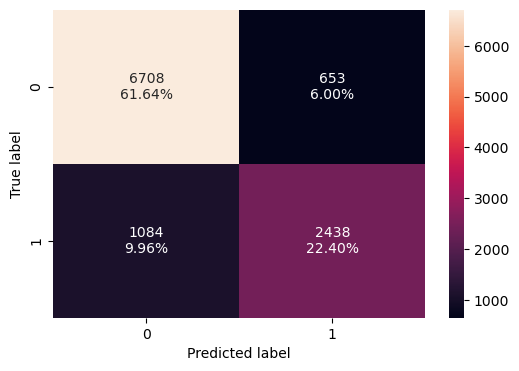

In [173]:
confusion_matrix_sklearn(NNH_7, x_test_knn, y_test_knn)

In [174]:
knn_perf_test_7 = model_performance_classification_sklearn(
    NNH_7, x_test_knn, y_test_knn
)
knn_perf_test_7

Accuracy   Recall  Precision        F1
0  0.840393  0.69222   0.788742  0.737336

## DECISION TREE MODEL

In [175]:
X_dt = d.drop(["booking_status"], axis=1)
Y_dt = d["booking_status"]

X_dt = pd.get_dummies(X_dt,columns=["room_type_reserved","market_segment_type","type_of_meal_plan"],drop_first=True)

#Converting values to float
X_dt = X_dt.astype(float)

# Splitting data in train and test sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, Y_dt, test_size=0.30, random_state=1)

In [176]:
print("Shape of Training set : ", X_train_dt.shape)
print("Shape of test set : ", X_test_dt.shape)
print("Percentage of classes in training set:")
print(y_train_dt.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test_dt.value_counts(normalize=True))

Shape of Training set :  (25392, 25)
Shape of test set :  (10883, 25)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


### Decision Tree (default)

In [177]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=1)

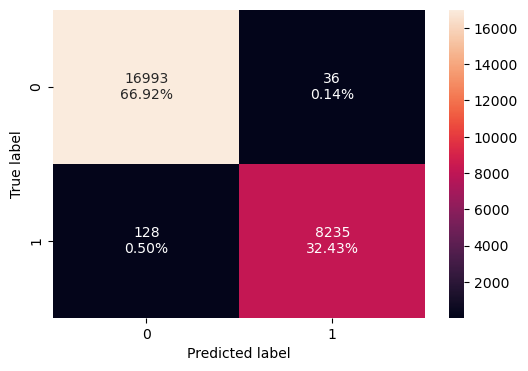

In [178]:
confusion_matrix_sklearn(model1, X_train_dt, y_train_dt)

In [179]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model1, X_train_dt, y_train_dt
)
decision_tree_perf_train_without

Accuracy    Recall  Precision        F1
0  0.993541  0.984694   0.995647  0.990141

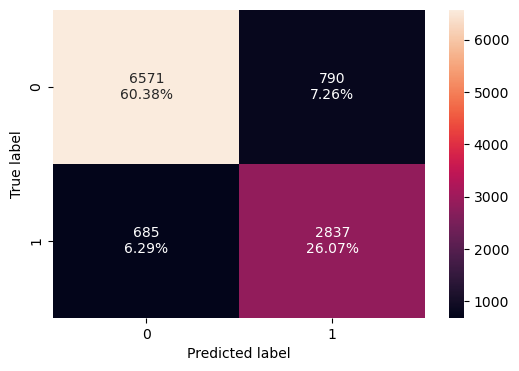

In [180]:
confusion_matrix_sklearn(model1, X_test_dt, y_test_dt)

In [181]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model1, X_test_dt, y_test_dt
)
decision_tree_perf_test_without

Accuracy    Recall  Precision        F1
0  0.864468  0.805508   0.782189  0.793677

### Visualizing the Decision Tree (model1)

In [182]:
feature_names = list(X_dt.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected']


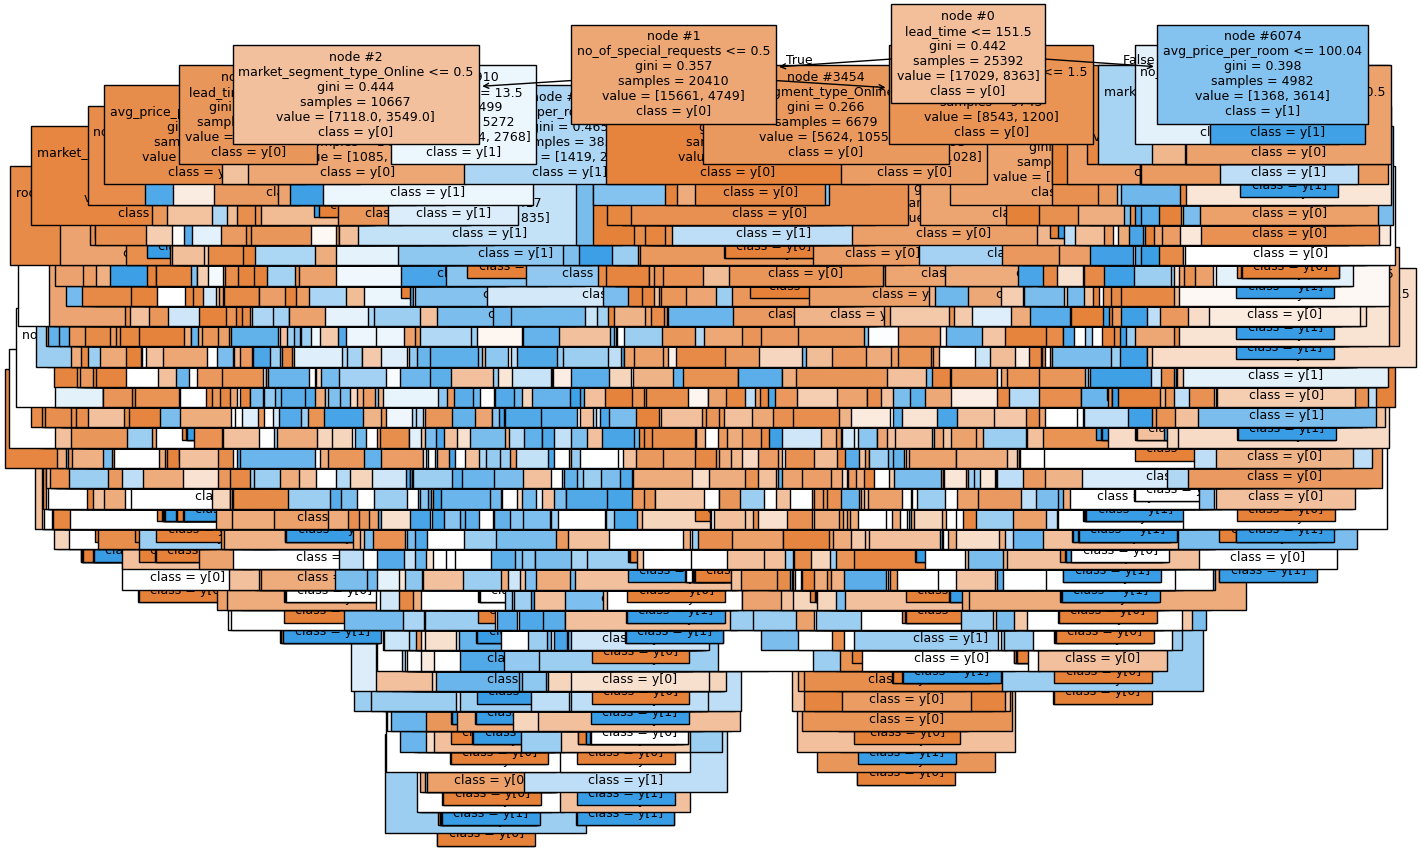

In [183]:
plt.figure(figsize=(15,10))

tree.plot_tree(model1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [184]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

In [185]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train_dt.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.383672
avg_price_per_room                    0.200675
market_segment_type_Online            0.093255
arrival_month                         0.079600
no_of_special_requests                0.067870
no_of_week_nights                     0.057795
no_of_weekend_nights                  0.042332
no_of_adults                          0.029590
type_of_meal_plan_Not Selected        0.009703
required_car_parking_space            0.007152
room_type_reserved_Room_Type 4        0.006993
no_of_children                        0.005878
type_of_meal_plan_Meal Plan 2         0.005002
market_segment_type_Offline           0.003598
room_type_reserved_Room_Type 2        0.002471
room_type_reserved_Room_Type 5        0.001236
room_type_reserved_Room_Type 6        0.001214
repeated_guest                        0.000905
market_segment_type_Corporate         0.000515
room_type_reserved_Room_Type 7        0.000299
no_of_previou

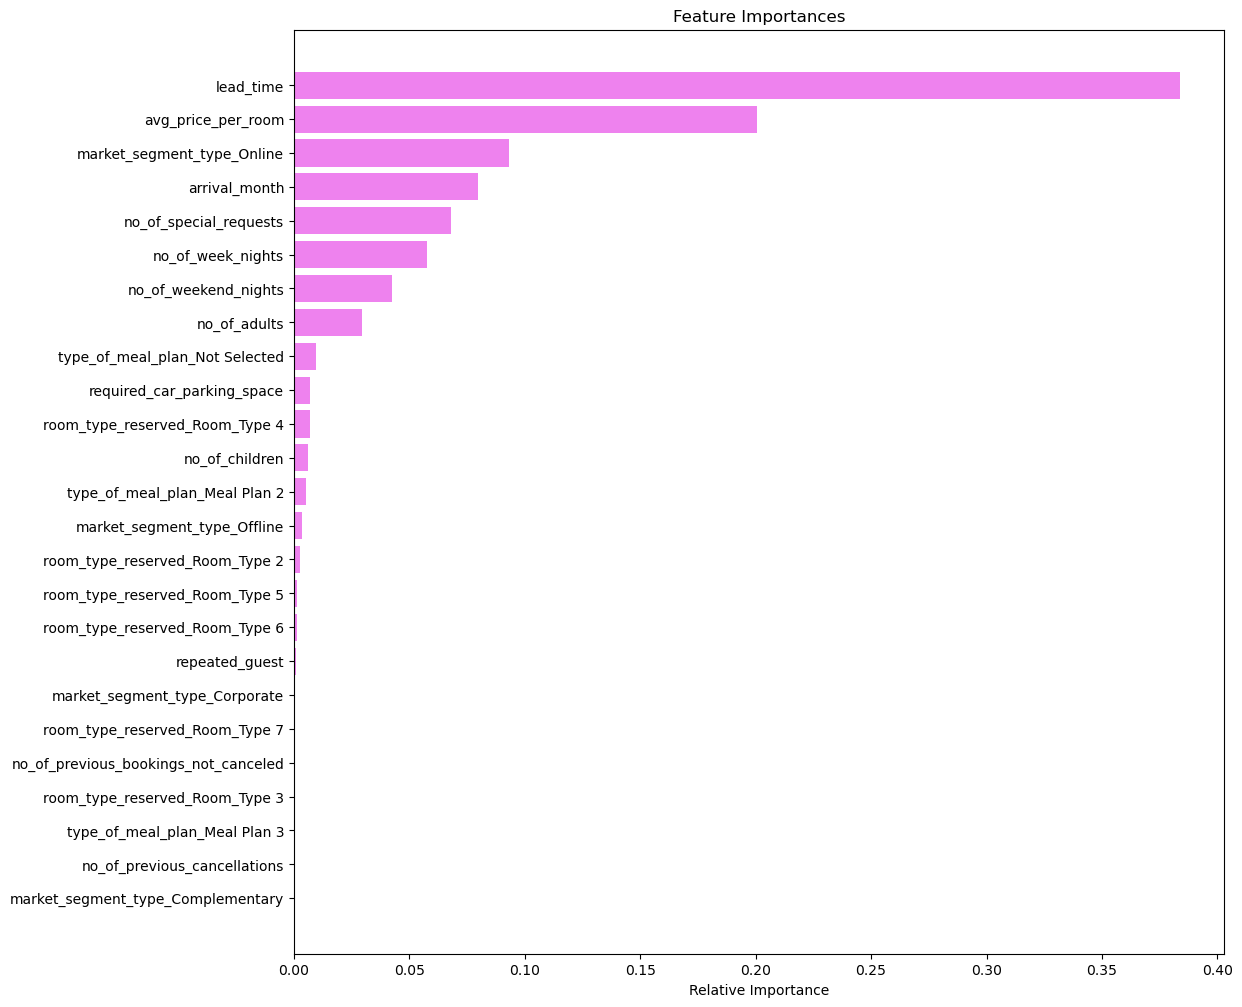

In [186]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Decision Tree (with max_depth = 4)

In [187]:
model2 = DecisionTreeClassifier(random_state=1,max_depth = 4)
model2.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=4, random_state=1)

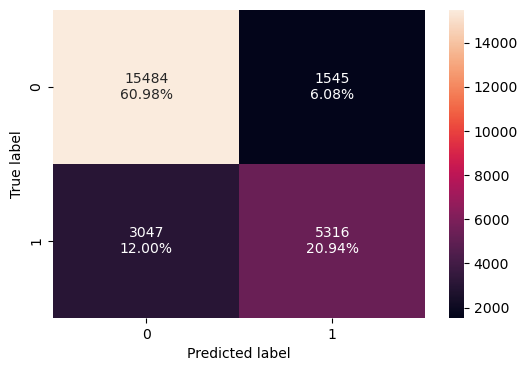

In [188]:
confusion_matrix_sklearn(model2, X_train_dt, y_train_dt)

In [189]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model2, X_train_dt, y_train_dt
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.819156  0.635657   0.774814  0.698371

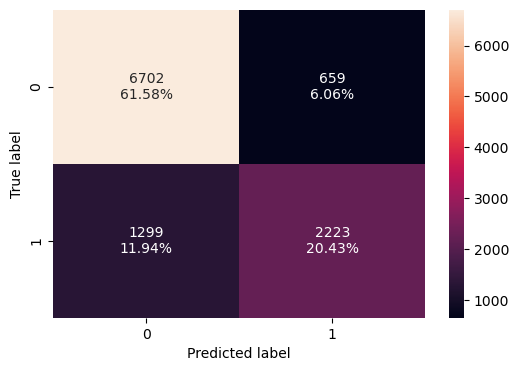

In [190]:
confusion_matrix_sklearn(model2, X_test_dt, y_test_dt)

In [191]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model2, X_test_dt, y_test_dt
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.820086  0.631175   0.771339  0.694254

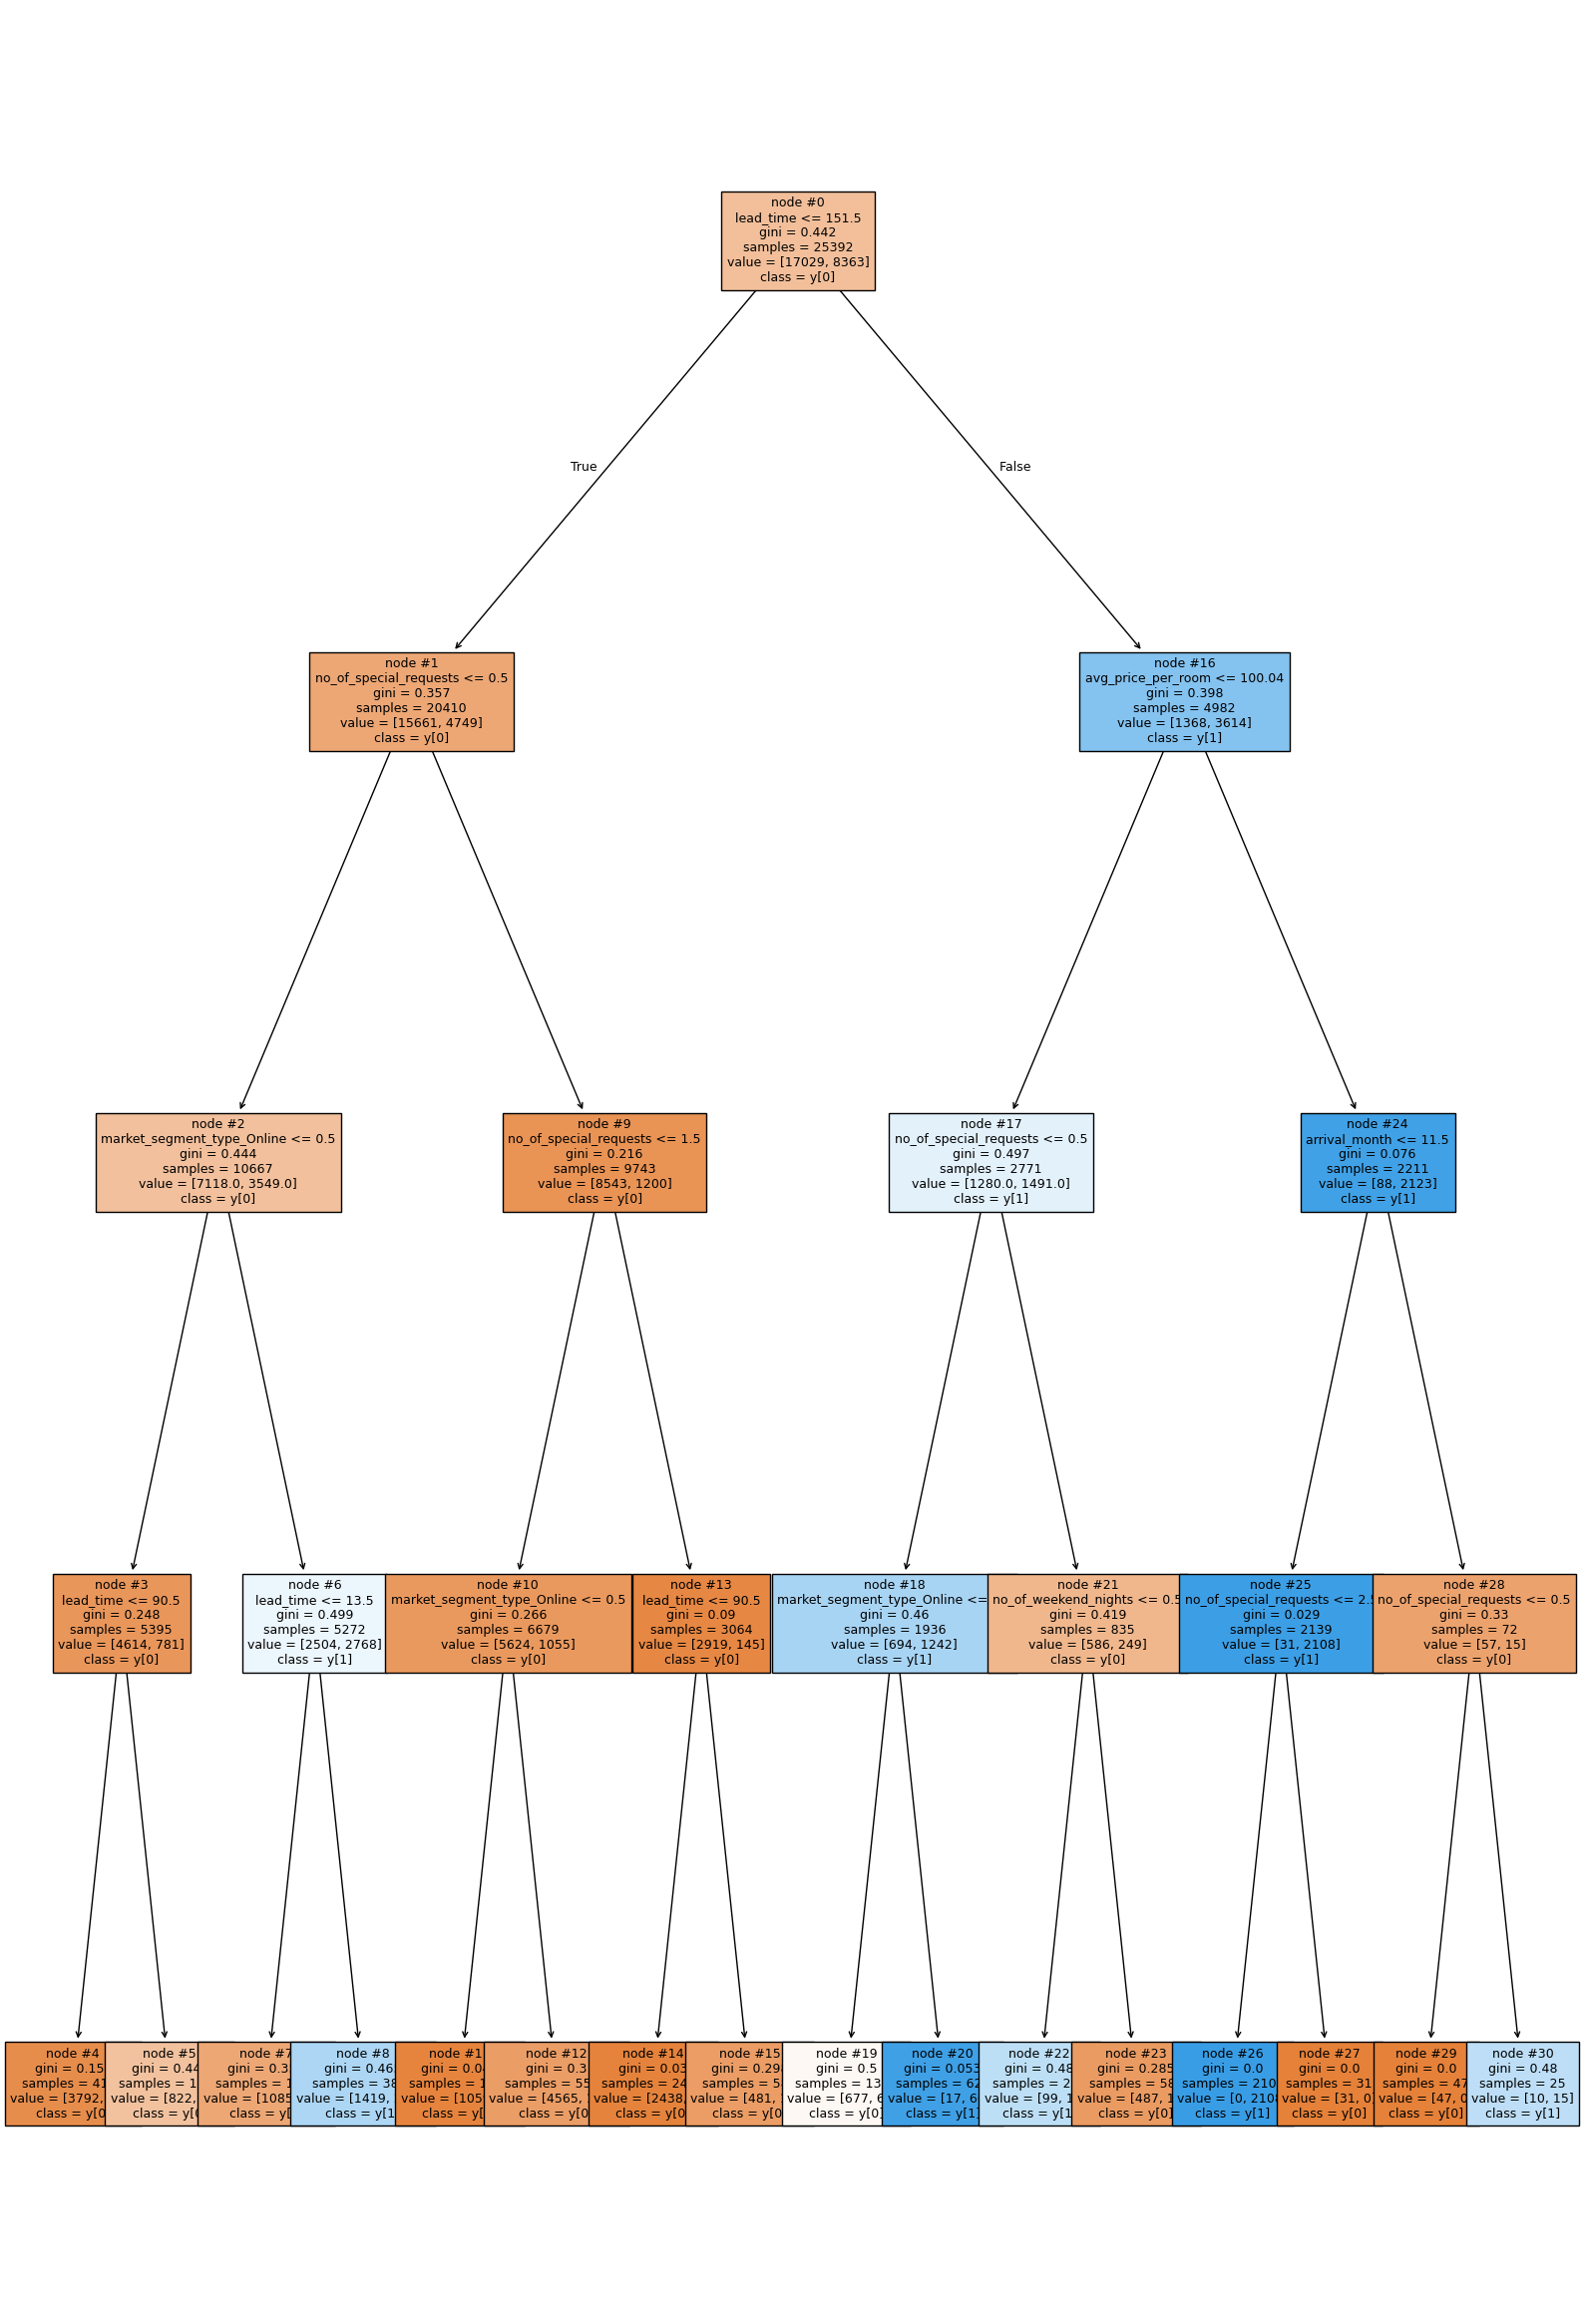

In [192]:
plt.figure(figsize=(20,30))
tree.plot_tree(model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [193]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model2,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- weights: [3792.00, 357.00] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- weights: [822.00, 424.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- weights: [1085.00, 328.00] class: 0
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- weights: [1419.00, 2440.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- market_segment_type_Online <= 0.50
|   |   |   |   |--- weights: [1059.00, 27.00] class: 0
|   |   |   |--- market_segment_type_Online >  0.50
|   |   |   |   |--- weights: [4565.00, 1028.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- weights: [2438.00, 38.00] class: 0
|   |   |   |--- lead_time > 

In [194]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model2.feature_importances_, columns = ["Imp"], index = X_train_dt.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.511917
market_segment_type_Online            0.214834
no_of_special_requests                0.149603
avg_price_per_room                    0.092481
arrival_month                         0.017756
no_of_weekend_nights                  0.013411
no_of_adults                          0.000000
room_type_reserved_Room_Type 5        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
type_of_meal_plan_Meal Plan 2         0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
no_of_children                        0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previou

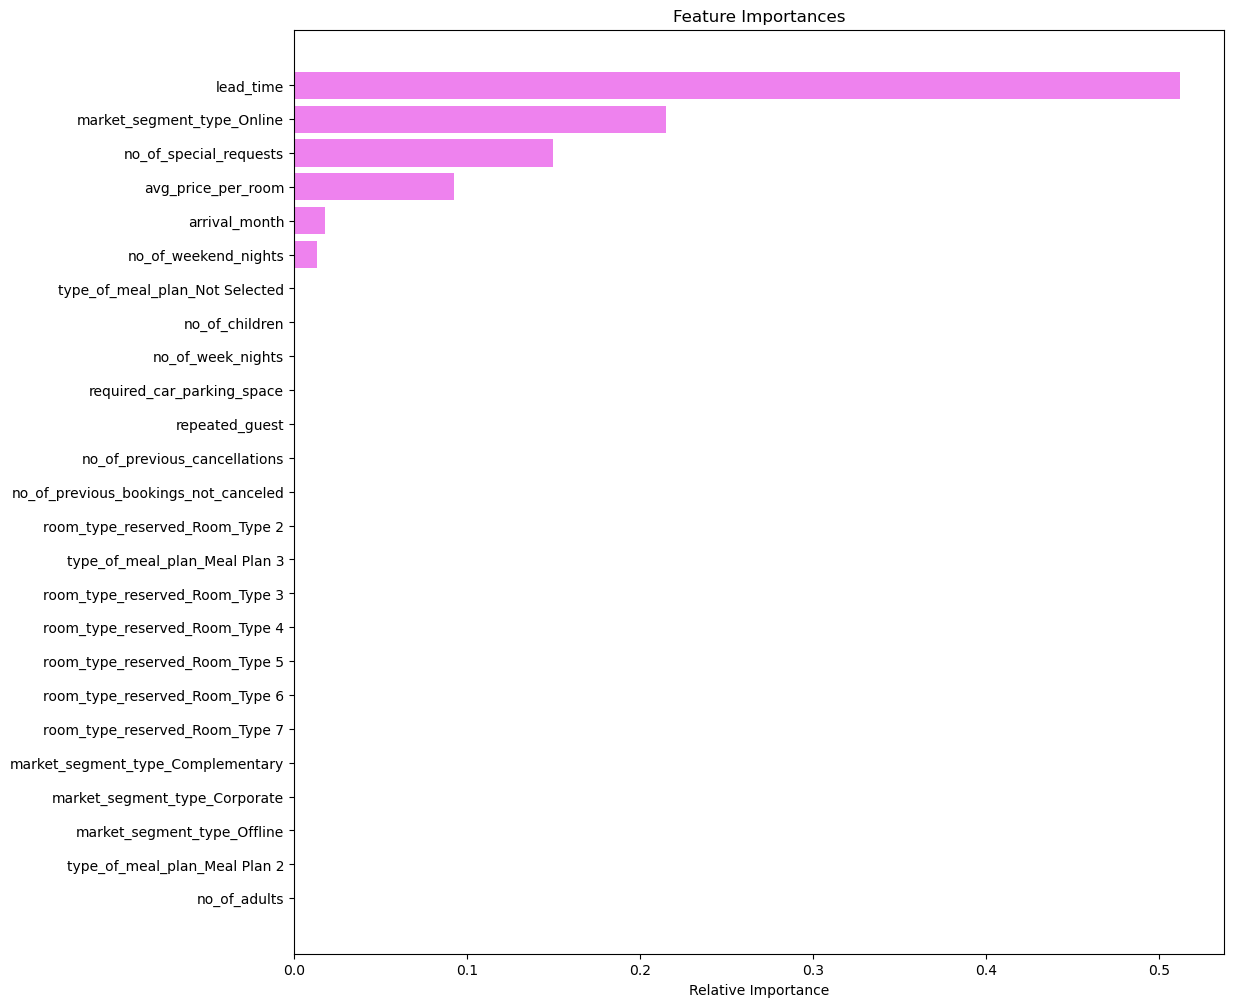

In [195]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Decision Tree (Pre-pruning)

In [196]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,10),
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    "max_leaf_nodes": [2, 3, 5, 10],
    'min_impurity_decrease': [0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

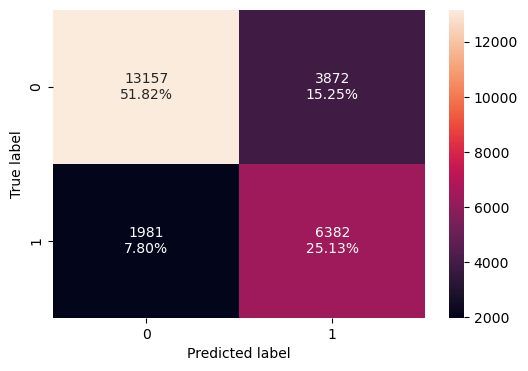

In [197]:
confusion_matrix_sklearn(estimator, X_train_dt, y_train_dt)

In [198]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train_dt, y_train_dt
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision       F1
0  0.769494  0.763123   0.622391  0.68561

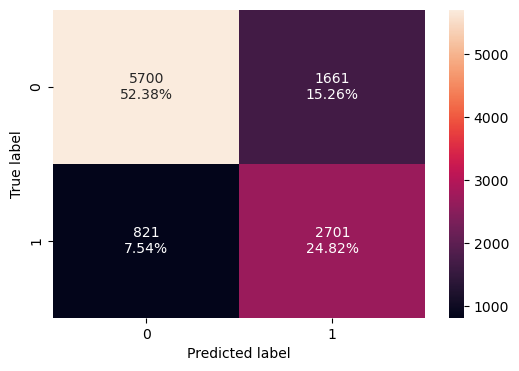

In [199]:
confusion_matrix_sklearn(estimator, X_test_dt, y_test_dt)

In [200]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test_dt, y_test_dt
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.771938  0.766894   0.619211  0.685185

In [201]:
feature_names = list(X_train_dt.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

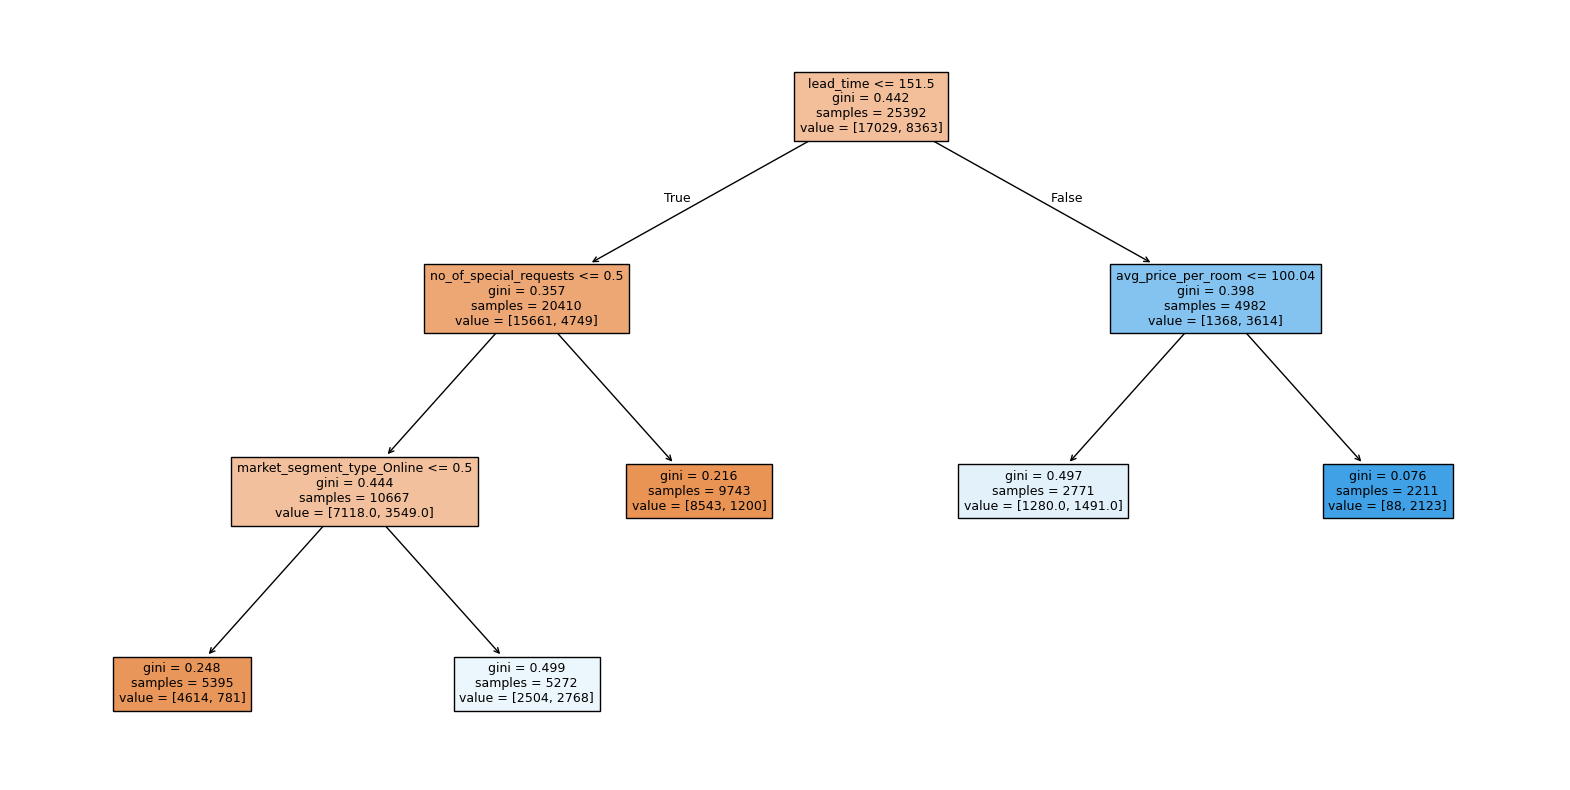

In [202]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [203]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2504.00, 2768.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8543.00, 1200.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1280.00, 1491.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [88.00, 2123.00] class: 1



In [204]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.53997004, 0.        , 0.        , 0.        , 0.        ,
       0.12170412, 0.12417599, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21414984, 0.        , 0.        , 0.        ])

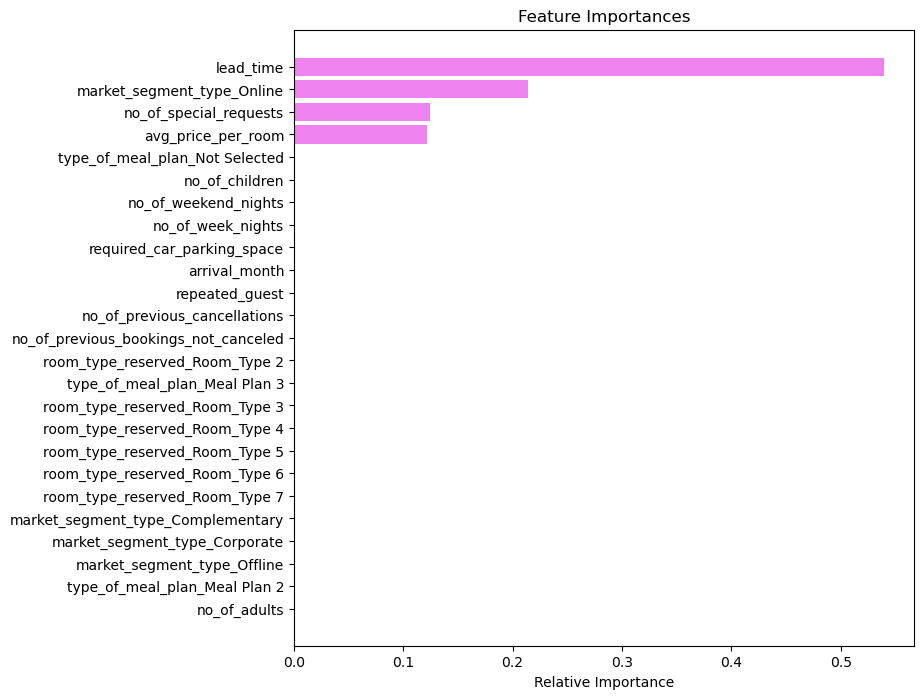

In [205]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree (Post-pruning)

In [206]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [207]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008309
1     4.327745e-07    0.008309
2     4.688391e-07    0.008310
3     5.329960e-07    0.008310
4     5.967043e-07    0.008311
...            ...         ...
1460  6.665684e-03    0.286897
1461  1.304480e-02    0.299942
1462  1.725993e-02    0.317202
1463  2.399048e-02    0.365183
1464  7.657789e-02    0.441761

[1465 rows x 2 columns]

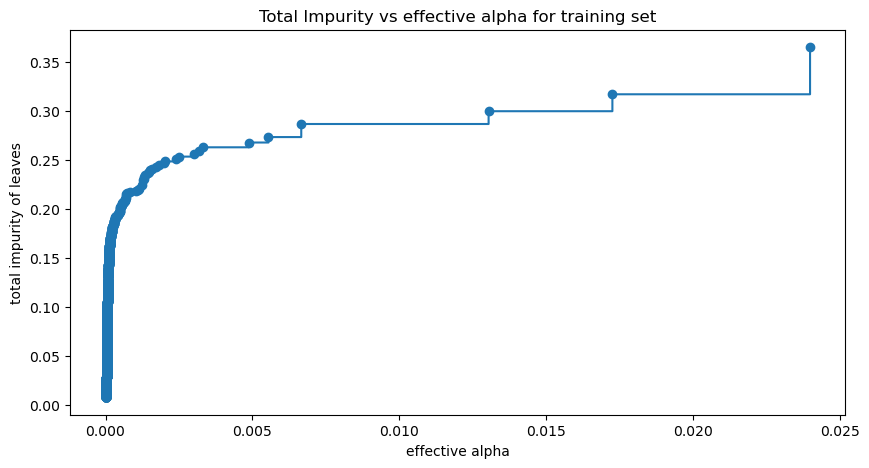

In [208]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [209]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train_dt, y_train_dt)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371352


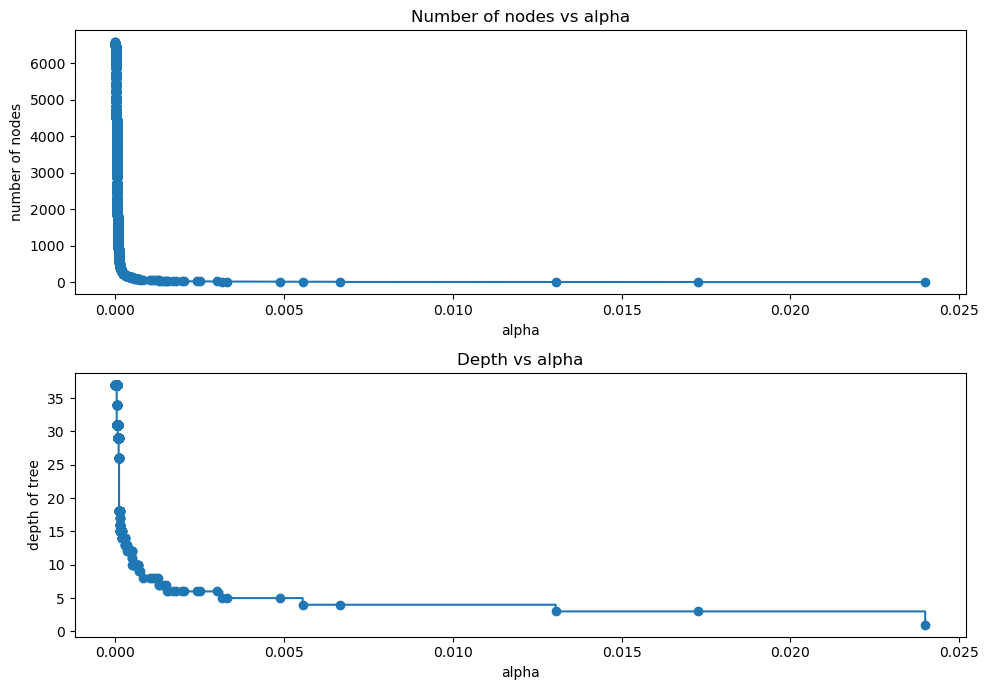

In [210]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets

In [211]:
train_scores = [clf.score(X_train_dt, y_train_dt) for clf in clfs]
test_scores = [clf.score(X_test_dt, y_test_dt) for clf in clfs]

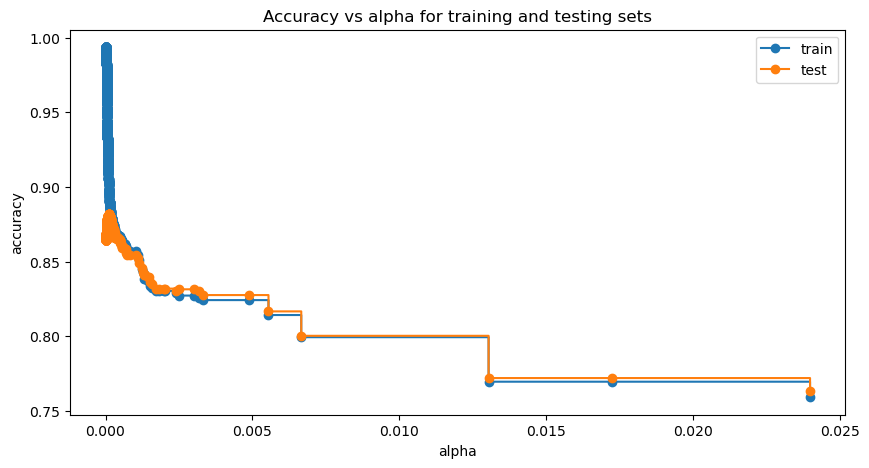

In [212]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [213]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train_dt, y_train_dt))
print('Test accuracy of best model: ',best_model.score(X_test_dt, y_test_dt))

DecisionTreeClassifier(ccp_alpha=0.00012145817320675542, random_state=1)
Training accuracy of best model:  0.8957939508506616
Test accuracy of best model:  0.8821097123954792


- In the context of predicting booking cancellations for INN Hotels Group, using the F1 score is recommended as it provides a balanced evaluation of both precision and recall.                                  
- A balanced strategy is critical to minimize false alarms, which could result in unnecessary adjustments and lost bookings, and to ensure precise cancellation identification.

In [214]:
f1_Score_train=[]
for clf in clfs:
    pred_train_pp=clf.predict(X_train_dt)
    values_train=metrics.f1_score(y_train_dt,pred_train_pp)
    f1_Score_train.append(values_train)

In [215]:
f1_Score_test=[]
for clf in clfs:
    pred_test_pp=clf.predict(X_test_dt)
    values_test=metrics.f1_score(y_test_dt,pred_test_pp)
    f1_Score_test.append(values_test)

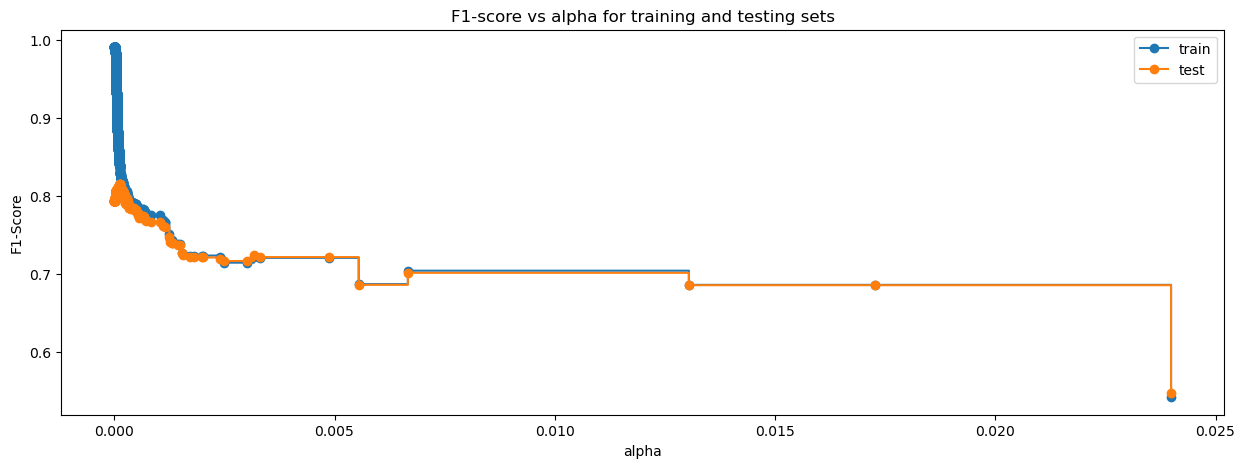

In [216]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1-Score")
ax.set_title("F1-score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_Score_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_Score_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [217]:
# creating the model where we get highest train and test F1 score
index_best_model = np.argmax(f1_Score_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001227954109219195, random_state=1)


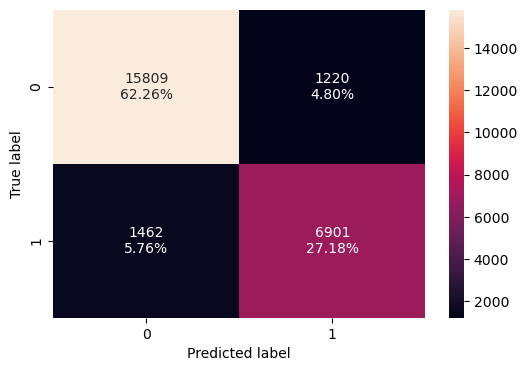

In [218]:
confusion_matrix_sklearn(best_model, X_train_dt, y_train_dt)

In [219]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train_dt, y_train_dt
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.894376  0.825182   0.849772  0.837297

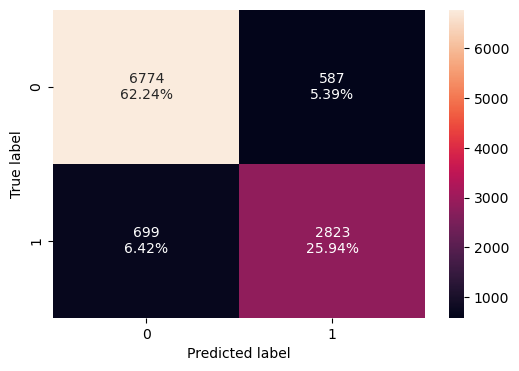

In [220]:
confusion_matrix_sklearn(best_model, X_test_dt, y_test_dt)

In [221]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test_dt, y_test_dt
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.881834  0.801533   0.827859  0.814484

### Visualizing the Decision Tree

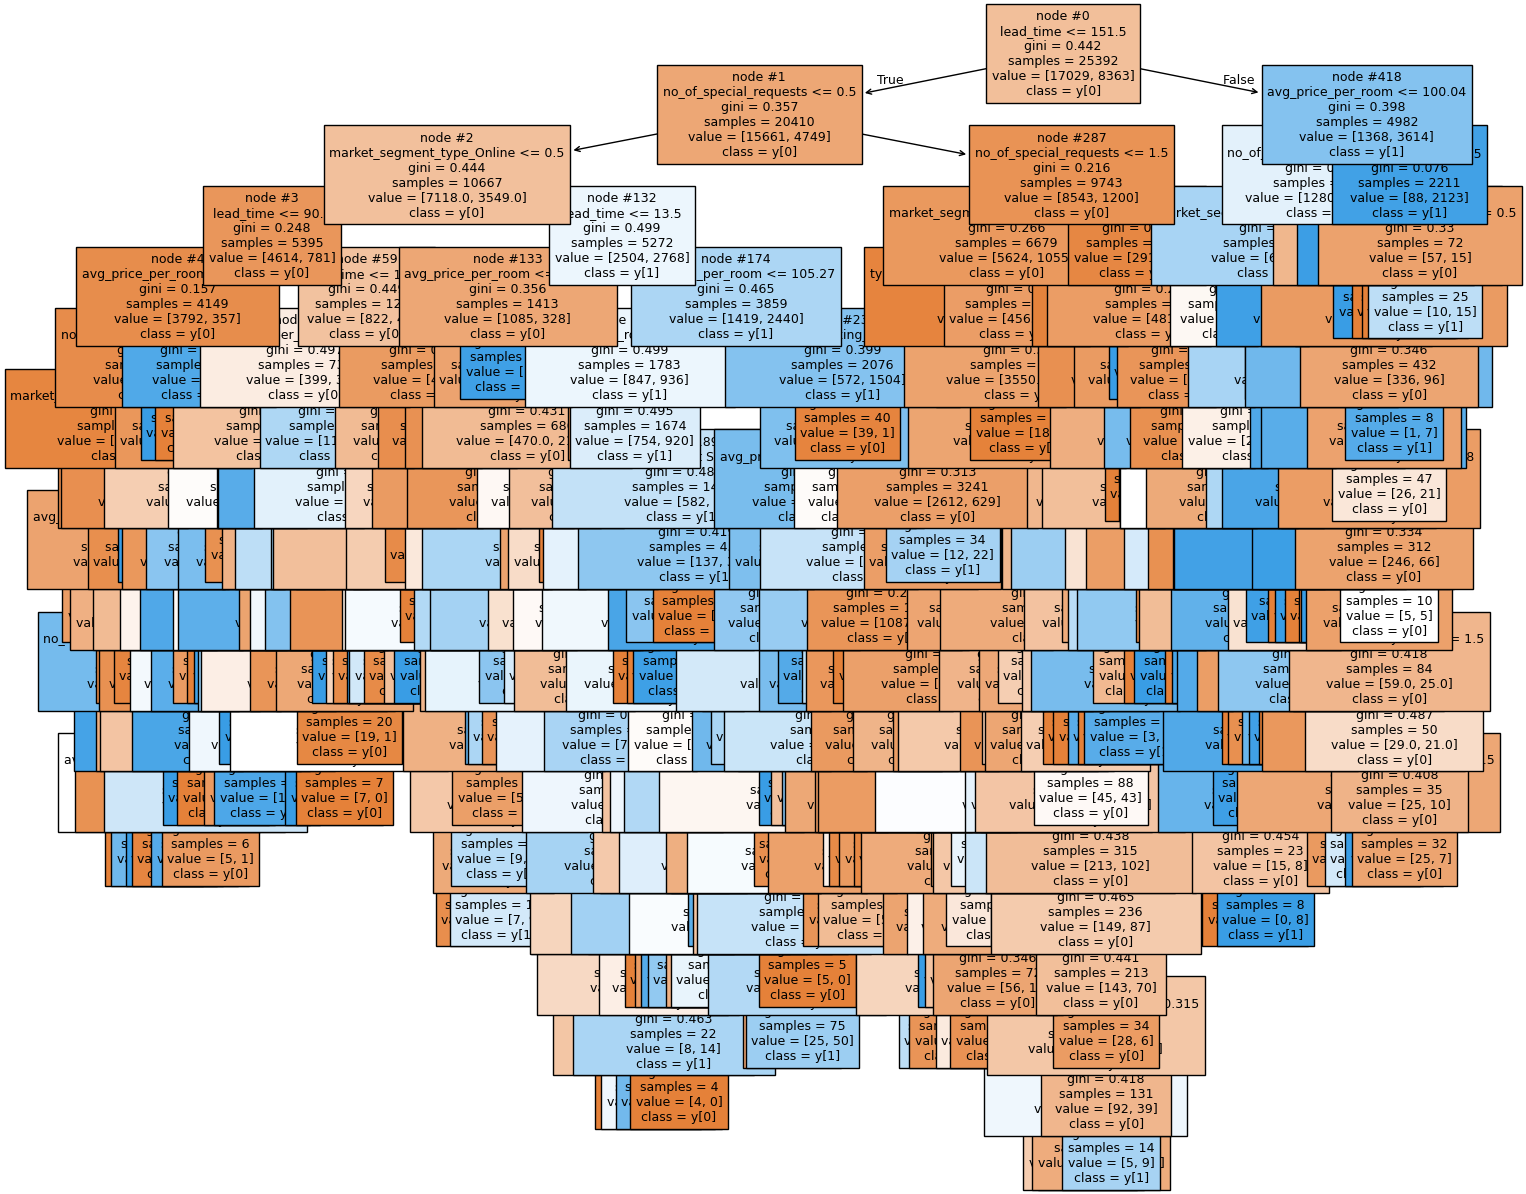

In [222]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [223]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- weights: [558.00, 43.00] class: 0
|   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |--- weights: [162.00, 36.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  135.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 8.00] class: 1
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- weights: [1609.00, 0.00] class: 0
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- lead_time <= 

In [224]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train_dt.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.413358
avg_price_per_room                    0.166253
market_segment_type_Online            0.142346
no_of_special_requests                0.102245
arrival_month                         0.068319
no_of_weekend_nights                  0.027876
no_of_adults                          0.027223
no_of_week_nights                     0.026140
required_car_parking_space            0.010310
type_of_meal_plan_Not Selected        0.004601
market_segment_type_Offline           0.004043
type_of_meal_plan_Meal Plan 2         0.002562
room_type_reserved_Room_Type 4        0.001494
no_of_children                        0.001402
room_type_reserved_Room_Type 2        0.001391
room_type_reserved_Room_Type 5        0.000436
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_res

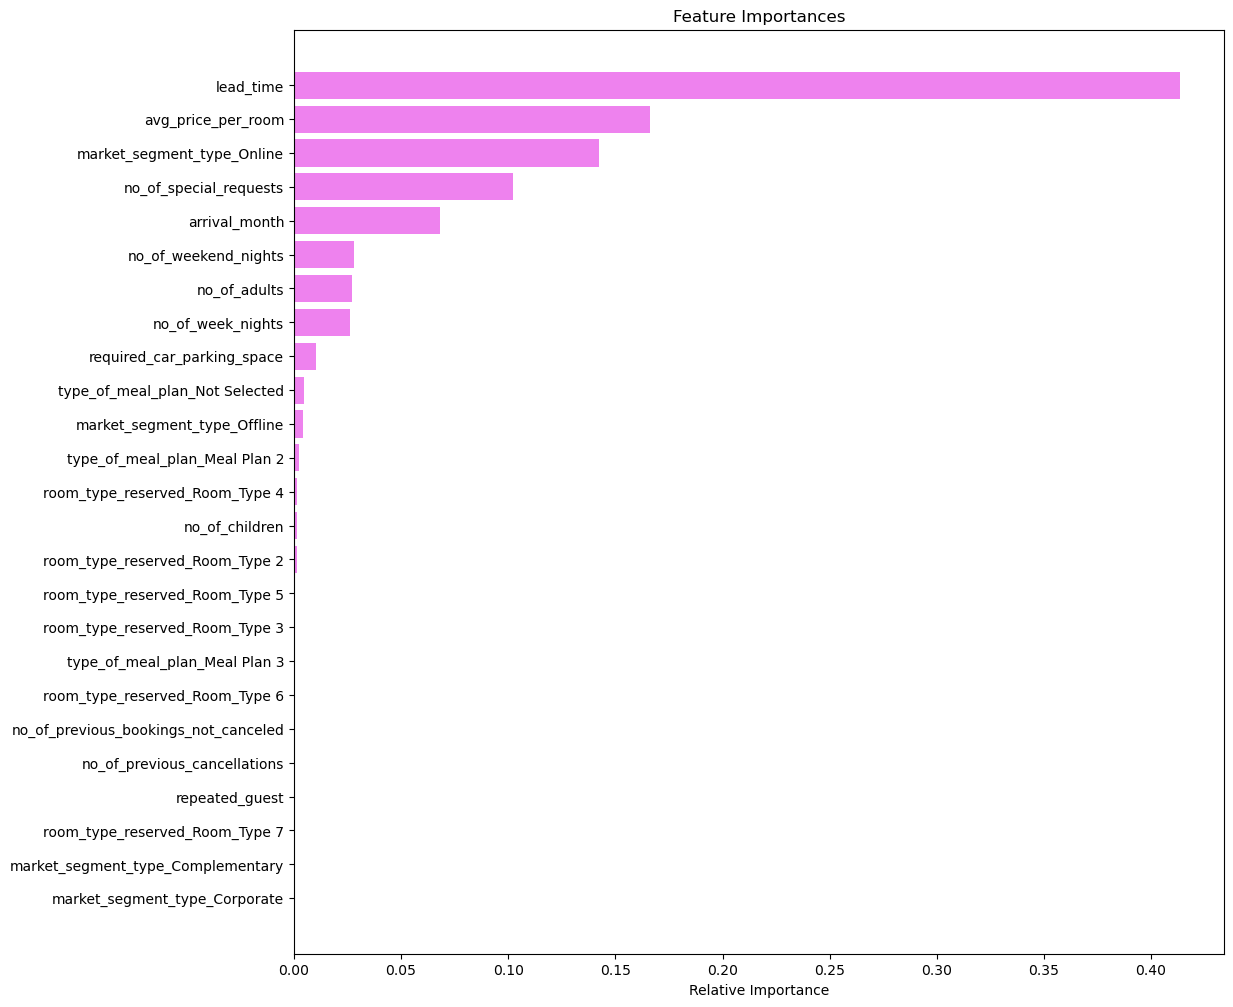

In [225]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [228]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        knn_perf_train_5.T,
        nb_perf_train.T,
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = ["Logis Reg Model 0.5 default Thresold",
    "Logis Reg Model -0.31 Threshold ROC-AUC curve ",
    "Logis Reg Model - 0.42 Threshold Pression-Recall curve",
    "KNN Model",
    "Naive-bayes model",
    "Decision Tree with no parameters",
    "Decision Tree with max-depth=4 ",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy    Recall  \
Logis Reg Model 0.5 default Thresold                0.804505  0.630845   
Logis Reg Model -0.31 Threshold ROC-AUC curve       0.775874  0.787595   
Logis Reg Model - 0.42 Threshold Pression-Recal...  0.801197  0.698521   
KNN Model                                           0.993463  0.983260   
Naive-bayes model                                   0.410681  0.964178   
Decision Tree with no parameters                    0.993541  0.984694   
Decision Tree with max-depth=4                      0.819156  0.635657   
Decision Tree (Pre-Pruning)                         0.769494  0.763123   
Decision Tree (Post-Pruning)                        0.894376  0.825182   

                                                    Precision        F1  
Logis Reg Model 0.5 default Thresold                 0.734911  0.678913  
Logis Reg Model -0.31 Threshold ROC-AUC curve        0.625430  0.697207  
Logis Reg Model - 0.42 Threshold Pression-Recal...   0.695845  0.697181  
KNN Model                                            0.996848  0.990007  
Naive-bayes model                                    0.353550  0.517384  
Decision Tree with no parameters                     0.995647  0.990141  
Decision Tree with max-depth=4                       0.774814  0.698371  
Decision Tree (Pre-Pruning)                          0.622391  0.685610  
Decision Tree (Post-Pruning)                         0.849772  0.837297

In [227]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        knn_perf_test_5.T,
        nb_perf_test.T,
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logis Reg Model 0.5 default Thresold",
    "Logis Reg Model -0.31 Threshold ROC-AUC curve ",
    "Logis Reg Model - 0.42 Threshold Pression-Recall curve",
    "KNN Model",
    "Naive-bayes model",
    "Decision Tree with no parameters",
    "Decision Tree with max-depth=4 ",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_train_comp_df.T

Test performance comparison:


Accuracy    Recall  \
Logis Reg Model 0.5 default Thresold                0.799504  0.621985   
Logis Reg Model -0.31 Threshold ROC-AUC curve       0.770560  0.787156   
Logis Reg Model - 0.42 Threshold Pression-Recal...  0.796288  0.691812   
KNN Model                                           0.836718  0.701590   
Naive-bayes model                                   0.408527  0.962984   
Decision Tree with no parameters                    0.864468  0.805508   
Decision Tree with max-depth=4                      0.820086  0.631175   
Decision Tree (Pre-Pruning)                         0.771938  0.766894   
Decision Tree (Post-Pruning)                        0.881834  0.801533   

                                                    Precision        F1  
Logis Reg Model 0.5 default Thresold                 0.726737  0.670293  
Logis Reg Model -0.31 Threshold ROC-AUC curve        0.617602  0.692146  
Logis Reg Model - 0.42 Threshold Pression-Recal...   0.688145  0.689973  
KNN Model                                            0.772912  0.735526  
Naive-bayes model                                    0.352603  0.516197  
Decision Tree with no parameters                     0.782189  0.793677  
Decision Tree with max-depth=4                       0.771339  0.694254  
Decision Tree (Pre-Pruning)                          0.619211  0.685185  
Decision Tree (Post-Pruning)                         0.827859  0.814484